<a href="https://colab.research.google.com/github/DA-Raihan/MMB/blob/main/MMB/LAST_TASK_HOMEFUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><strong><font color="blue">Uraian Kelas Terakhir</font></strong></h1></center>

* <strong><font color="blue">Penelaahan Data (EDA)</font></strong>
  * Memuat Data & Meyakinkan Tipe Data
  * Noise
  * Duplikasi
  * Outlier
  * Missing Value
  * Transformasi
  * Statistika Deskriptif
  * Visualisasi & Analisa
  * Simpan data untuk pemodelan

# STUDI KASUS

1. Data sensus Amerika tahun 1994
2. Variabel Target : individu dengan jumlah penghasilan  lebih dan kurang dari 50.000 USD
3. Variabel Prediktor : 	Umur,Sektor, fnlwgt, Pendidikan,	KelasPendidikan	Status,	Pekerjaan,	Relationship,	Ras	Gender,	Gain,	Loss,	JamKerjaHarian dan	AsalNegara
4. Keterangan data : http://archive.ics.uci.edu/dataset/2/adult
5. Pada analisis ini menggunakan data mirror dalam format csv dari Tau-Data : https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv

## Data Loading

In [ ]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan

file_ = 'data/adult.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

--2024-01-07 03:38:58--  https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5342628 (5.1M) [text/plain]
Saving to: ‘data/adult.csv’

adult.csv           100%[===================>]   5.09M  --.-KB/s    in 0.04s   

2024-01-07 03:38:59 (125 MB/s) - ‘data/adult.csv’ saved [5342628/5342628]

baris =  48842 , Kolom (jumlah variabel) =  15


Umur            Sektor  fnlwgt Pendidikan  KelasPendidikan  \
0    39         State-gov   77516  Bachelors               13   
1    50  Self-emp-not-inc   83311  Bachelors               13   
2    38           Private  215646    HS-grad                9   
3    53           Private  234721       11th                7   
4    28           Private  338409  Bachelors               13   

               Status          Pekerjaan   Relationship    Ras  Gender  Gain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male     0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male     0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male     0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female     0   

   Loss  JamKerjaHarian     AsalNegara Penghasilan  
0     0              40  United-States       <=50K  
1     0              13  United-States       <=50K  
2     0              40  United-States       <=50K  
3     0              40  United-States       <=50K  
4     0              40           Cuba       <=50K

## EDA

### cek kelengkapan data dan integritas data



In [ ]:
# cek informasi tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Umur             48842 non-null  int64 
 1   Sektor           48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   Pendidikan       48842 non-null  object
 4   KelasPendidikan  48842 non-null  int64 
 5   Status           48842 non-null  object
 6   Pekerjaan        48842 non-null  object
 7   Relationship     48842 non-null  object
 8   Ras              48842 non-null  object
 9   Gender           48842 non-null  object
 10  Gain             48842 non-null  int64 
 11  Loss             48842 non-null  int64 
 12  JamKerjaHarian   48842 non-null  int64 
 13  AsalNegara       48842 non-null  object
 14  Penghasilan      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

Umur        fnlwgt  KelasPendidikan          Gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

               Loss  JamKerjaHarian  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

**Cek Duplikasi pada Data**

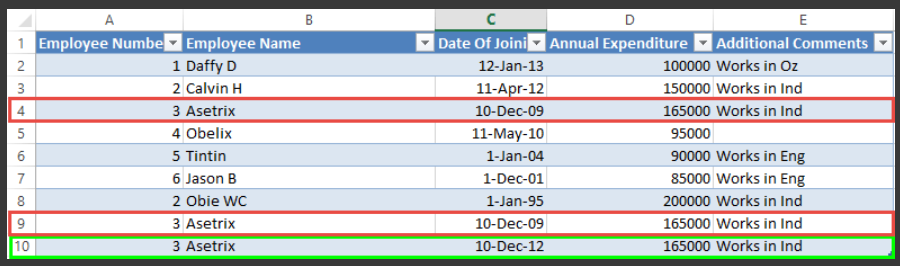

In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(48842, 15)
jumlah data yang duplikat 29


Umur   Sektor  fnlwgt    Pendidikan  KelasPendidikan         Status  \
4881     25  Private  308144     Bachelors               13  Never-married   
5104     90  Private   52386  Some-college               10  Never-married   
9171     21  Private  250051  Some-college               10  Never-married   
11631    20  Private  107658  Some-college               10  Never-married   
13084    25  Private  195994       1st-4th                2  Never-married   

             Pekerjaan   Relationship                 Ras  Gender  Gain  Loss  \
4881      Craft-repair  Not-in-family               White    Male     0     0   
5104     Other-service  Not-in-family  Asian-Pac-Islander    Male     0     0   
9171    Prof-specialty      Own-child               White  Female     0     0   
11631     Tech-support  Not-in-family               White  Female     0     0   
13084  Priv-house-serv  Not-in-family               White  Female     0     0   

       JamKerjaHarian     AsalNegara Penghasilan  
4881               40         Mexico       <=50K  
5104               35  United-States       <=50K  
9171               10  United-States       <=50K  
11631              10  United-States       <=50K  
13084              40      Guatemala       <=50K

In [ ]:
#menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(48813, 15)


**Check Noise pada Variabel**

In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

Sektor Pendidikan              Status          Pekerjaan  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    Relationship    Ras  Gender     AsalNegara Penghasilan  
0  Not-in-family  White    Male  United-States       <=50K  
1        Husband  White    Male  United-States       <=50K  
2  Not-in-family  White    Male  United-States       <=50K  
3        Husband  Black    Male  United-States       <=50K  
4           Wife  Black  Female           Cuba       <=50K

In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48813 non-null  int64   
 1   Sektor           48813 non-null  category
 2   fnlwgt           48813 non-null  int64   
 3   Pendidikan       48813 non-null  category
 4   KelasPendidikan  48813 non-null  int64   
 5   Status           48813 non-null  category
 6   Pekerjaan        48813 non-null  category
 7   Relationship     48813 non-null  category
 8   Ras              48813 non-null  category
 9   Gender           48813 non-null  category
 10  Gain             48813 non-null  int64   
 11  Loss             48813 non-null  int64   
 12  JamKerjaHarian   48813 non-null  int64   
 13  AsalNegara       48813 non-null  category
 14  Penghasilan      48813 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


### cek noise data kategorik

In [ ]:
# get all unique values of a variable/column
catVar = df.select_dtypes(include = ['object', 'category'])
numVar = df.select_dtypes(include = ['int', 'float'])

for col in catVar.columns:
    print(col,': ', set(catVar[col].unique()))

Sektor :  {'Private', 'Self-emp-inc', 'Local-gov', 'Never-worked', '?', 'Without-pay', 'Federal-gov', 'Self-emp-not-inc', 'State-gov'}
Pendidikan :  {'Some-college', 'Doctorate', '10th', '12th', 'Preschool', 'Bachelors', 'Assoc-voc', '7th-8th', 'HS-grad', 'Assoc-acdm', '5th-6th', '1st-4th', '11th', 'Prof-school', '9th', 'Masters'}
Status :  {'Never-married', 'Married-AF-spouse', 'Widowed', 'Married-civ-spouse', 'Married-spouse-absent', 'Divorced', 'Separated'}
Pekerjaan :  {'Protective-serv', 'Exec-managerial', 'Tech-support', 'Handlers-cleaners', 'Transport-moving', '?', 'Prof-specialty', 'Adm-clerical', 'Farming-fishing', 'Craft-repair', 'Sales', 'Priv-house-serv', 'Armed-Forces', 'Other-service', 'Machine-op-inspct'}
Relationship :  {'Other-relative', 'Not-in-family', 'Wife', 'Unmarried', 'Own-child', 'Husband'}
Ras :  {'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'Other', 'White'}
Gender :  {'Male', 'Female'}
AsalNegara :  {'Peru', 'China', '?', 'Iran', 'Italy', 'Taiwan', '

ADA YANG LIHAT KEANEHAN ?

In [ ]:
# mengganti value data dengan value yang sesungguhnya
import numpy as np

df['Penghasilan'] = df['Penghasilan'].replace(to_replace=">50K.", value=">50K")
df['Penghasilan'] = df['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
df['Sektor'] = df['Sektor'].replace(to_replace="?", value=np.nan)
df['Pekerjaan'] = df['Pekerjaan'].replace(to_replace="?", value=np.nan)
df['AsalNegara'] = df['AsalNegara'].replace(to_replace="?", value=np.nan)

for col in df.select_dtypes(include = ['object', 'category']).columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Private', 'Self-emp-inc', 'Local-gov', 'Never-worked', 'Without-pay', 'Federal-gov', 'Self-emp-not-inc', nan, 'State-gov'}
Pendidikan :  {'Some-college', 'Doctorate', '10th', '12th', 'Preschool', 'Bachelors', 'Assoc-voc', '7th-8th', 'HS-grad', 'Assoc-acdm', '5th-6th', '1st-4th', '11th', 'Prof-school', '9th', 'Masters'}
Status :  {'Never-married', 'Married-AF-spouse', 'Widowed', 'Married-civ-spouse', 'Married-spouse-absent', 'Divorced', 'Separated'}
Pekerjaan :  {nan, 'Protective-serv', 'Exec-managerial', 'Tech-support', 'Handlers-cleaners', 'Transport-moving', 'Prof-specialty', 'Adm-clerical', 'Farming-fishing', 'Craft-repair', 'Sales', 'Priv-house-serv', 'Armed-Forces', 'Other-service', 'Machine-op-inspct'}
Relationship :  {'Other-relative', 'Not-in-family', 'Wife', 'Unmarried', 'Own-child', 'Husband'}
Ras :  {'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'Other', 'White'}
Gender :  {'Male', 'Female'}
AsalNegara :  {'Peru', 'China', 'Italy', 'Iran', 'Taiwan', 'Hondu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             48813 non-null  int64   
 1   Sektor           46014 non-null  category
 2   fnlwgt           48813 non-null  int64   
 3   Pendidikan       48813 non-null  category
 4   KelasPendidikan  48813 non-null  int64   
 5   Status           48813 non-null  category
 6   Pekerjaan        46004 non-null  category
 7   Relationship     48813 non-null  category
 8   Ras              48813 non-null  category
 9   Gender           48813 non-null  category
 10  Gain             48813 non-null  int64   
 11  Loss             48813 non-null  int64   
 12  JamKerjaHarian   48813 non-null  int64   
 13  AsalNegara       47957 non-null  category
 14  Penghasilan      48813 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


In [ ]:
catVar['Penghasilan'] = catVar['Penghasilan'].replace(to_replace=">50K.", value=">50K")
catVar['Penghasilan'] = catVar['Penghasilan'].replace(to_replace="<=50K.", value="<=50K")
catVar['Sektor'] = catVar['Sektor'].replace(to_replace="?", value=np.nan)
catVar['Pekerjaan'] = catVar['Pekerjaan'].replace(to_replace="?", value=np.nan)
catVar['AsalNegara'] = catVar['AsalNegara'].replace(to_replace="?", value=np.nan)

In [ ]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

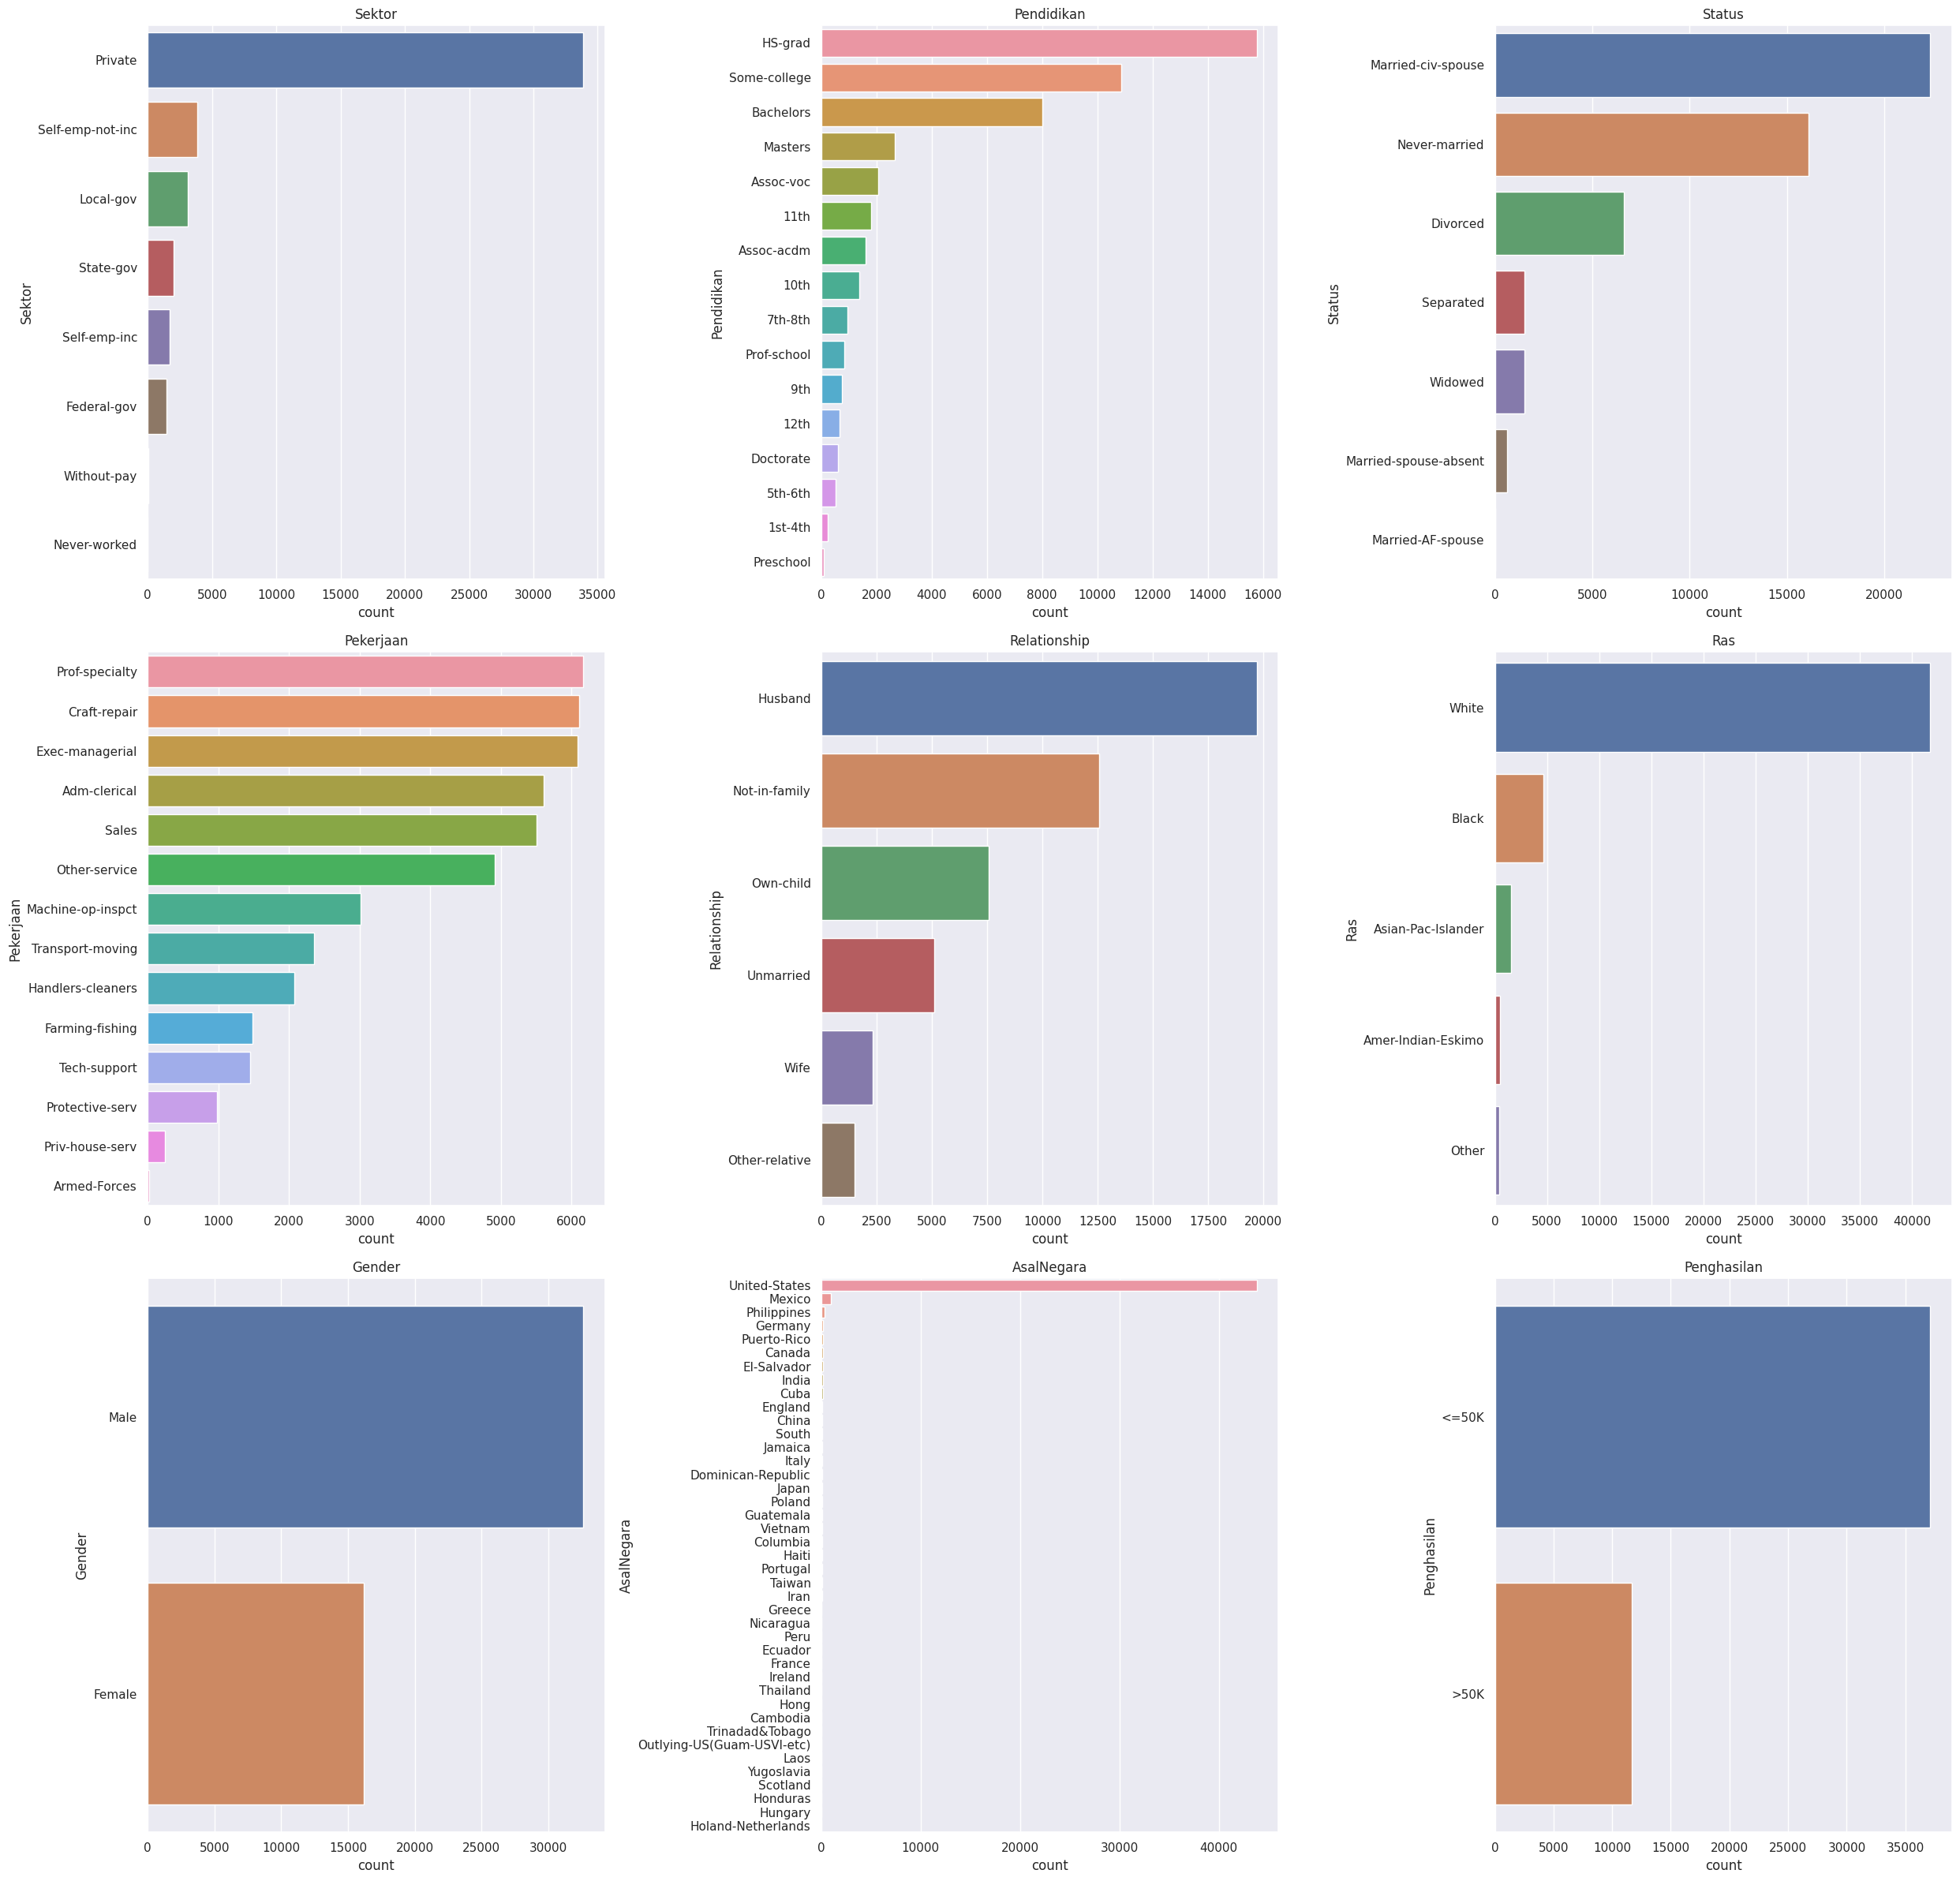

In [ ]:
# Menghitung jumlah baris dan kolom subplot
num_variables = len(catVar.columns)
num_cols = 3  # Sesuaikan sesuai kebutuhan
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 8 * num_rows))

# Menggunakan Seaborn untuk membuat countplot dalam grid
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = catVar.columns[i]
        if catVar[col].dtype == 'bool':
            sns.countplot(y=col, data=catVar.astype({col: 'object'}), ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        else:
            sns.countplot(y=col, data=catVar, ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

In [ ]:
# combine value variabel pendidikan
df['Pendidikan'] = df['Pendidikan'].replace(to_replace=["1st-4th", "5th-6th"], value="Elementary School")
df['Pendidikan'] = df['Pendidikan'].replace(to_replace=["7th-8th", "9th"], value="Junior High School")
df['Pendidikan'] = df['Pendidikan'].replace(to_replace=["10th", "11th", "12th"], value="Senior High School")

df['Sektor'] = df['Sektor'].replace(to_replace=['Without-pay', 'Never-worked'], value="Not Pay")
df['Sektor'] = df['Sektor'].replace(to_replace=['Local-gov', 'State-gov', 'Federal-gov'], value="Government")

In [ ]:
for col in df.select_dtypes(include = ['category']).columns:
    print(col,': ', set(df[col].unique()))

Sektor :  {'Government', 'Private', 'Self-emp-inc', 'Not Pay', 'Self-emp-not-inc', nan}
Pendidikan :  {'Some-college', 'Doctorate', 'Senior High School', 'Preschool', 'Bachelors', 'Assoc-voc', 'HS-grad', 'Assoc-acdm', 'Prof-school', 'Junior High School', 'Elementary School', 'Masters'}
Status :  {'Never-married', 'Married-AF-spouse', 'Widowed', 'Married-civ-spouse', 'Married-spouse-absent', 'Divorced', 'Separated'}
Pekerjaan :  {nan, 'Protective-serv', 'Exec-managerial', 'Tech-support', 'Handlers-cleaners', 'Transport-moving', 'Prof-specialty', 'Adm-clerical', 'Farming-fishing', 'Craft-repair', 'Sales', 'Priv-house-serv', 'Armed-Forces', 'Other-service', 'Machine-op-inspct'}
Relationship :  {'Other-relative', 'Not-in-family', 'Wife', 'Unmarried', 'Own-child', 'Husband'}
Ras :  {'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'Other', 'White'}
Gender :  {'Male', 'Female'}
AsalNegara :  {'Peru', 'China', 'Italy', 'Iran', 'Taiwan', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Poland', 

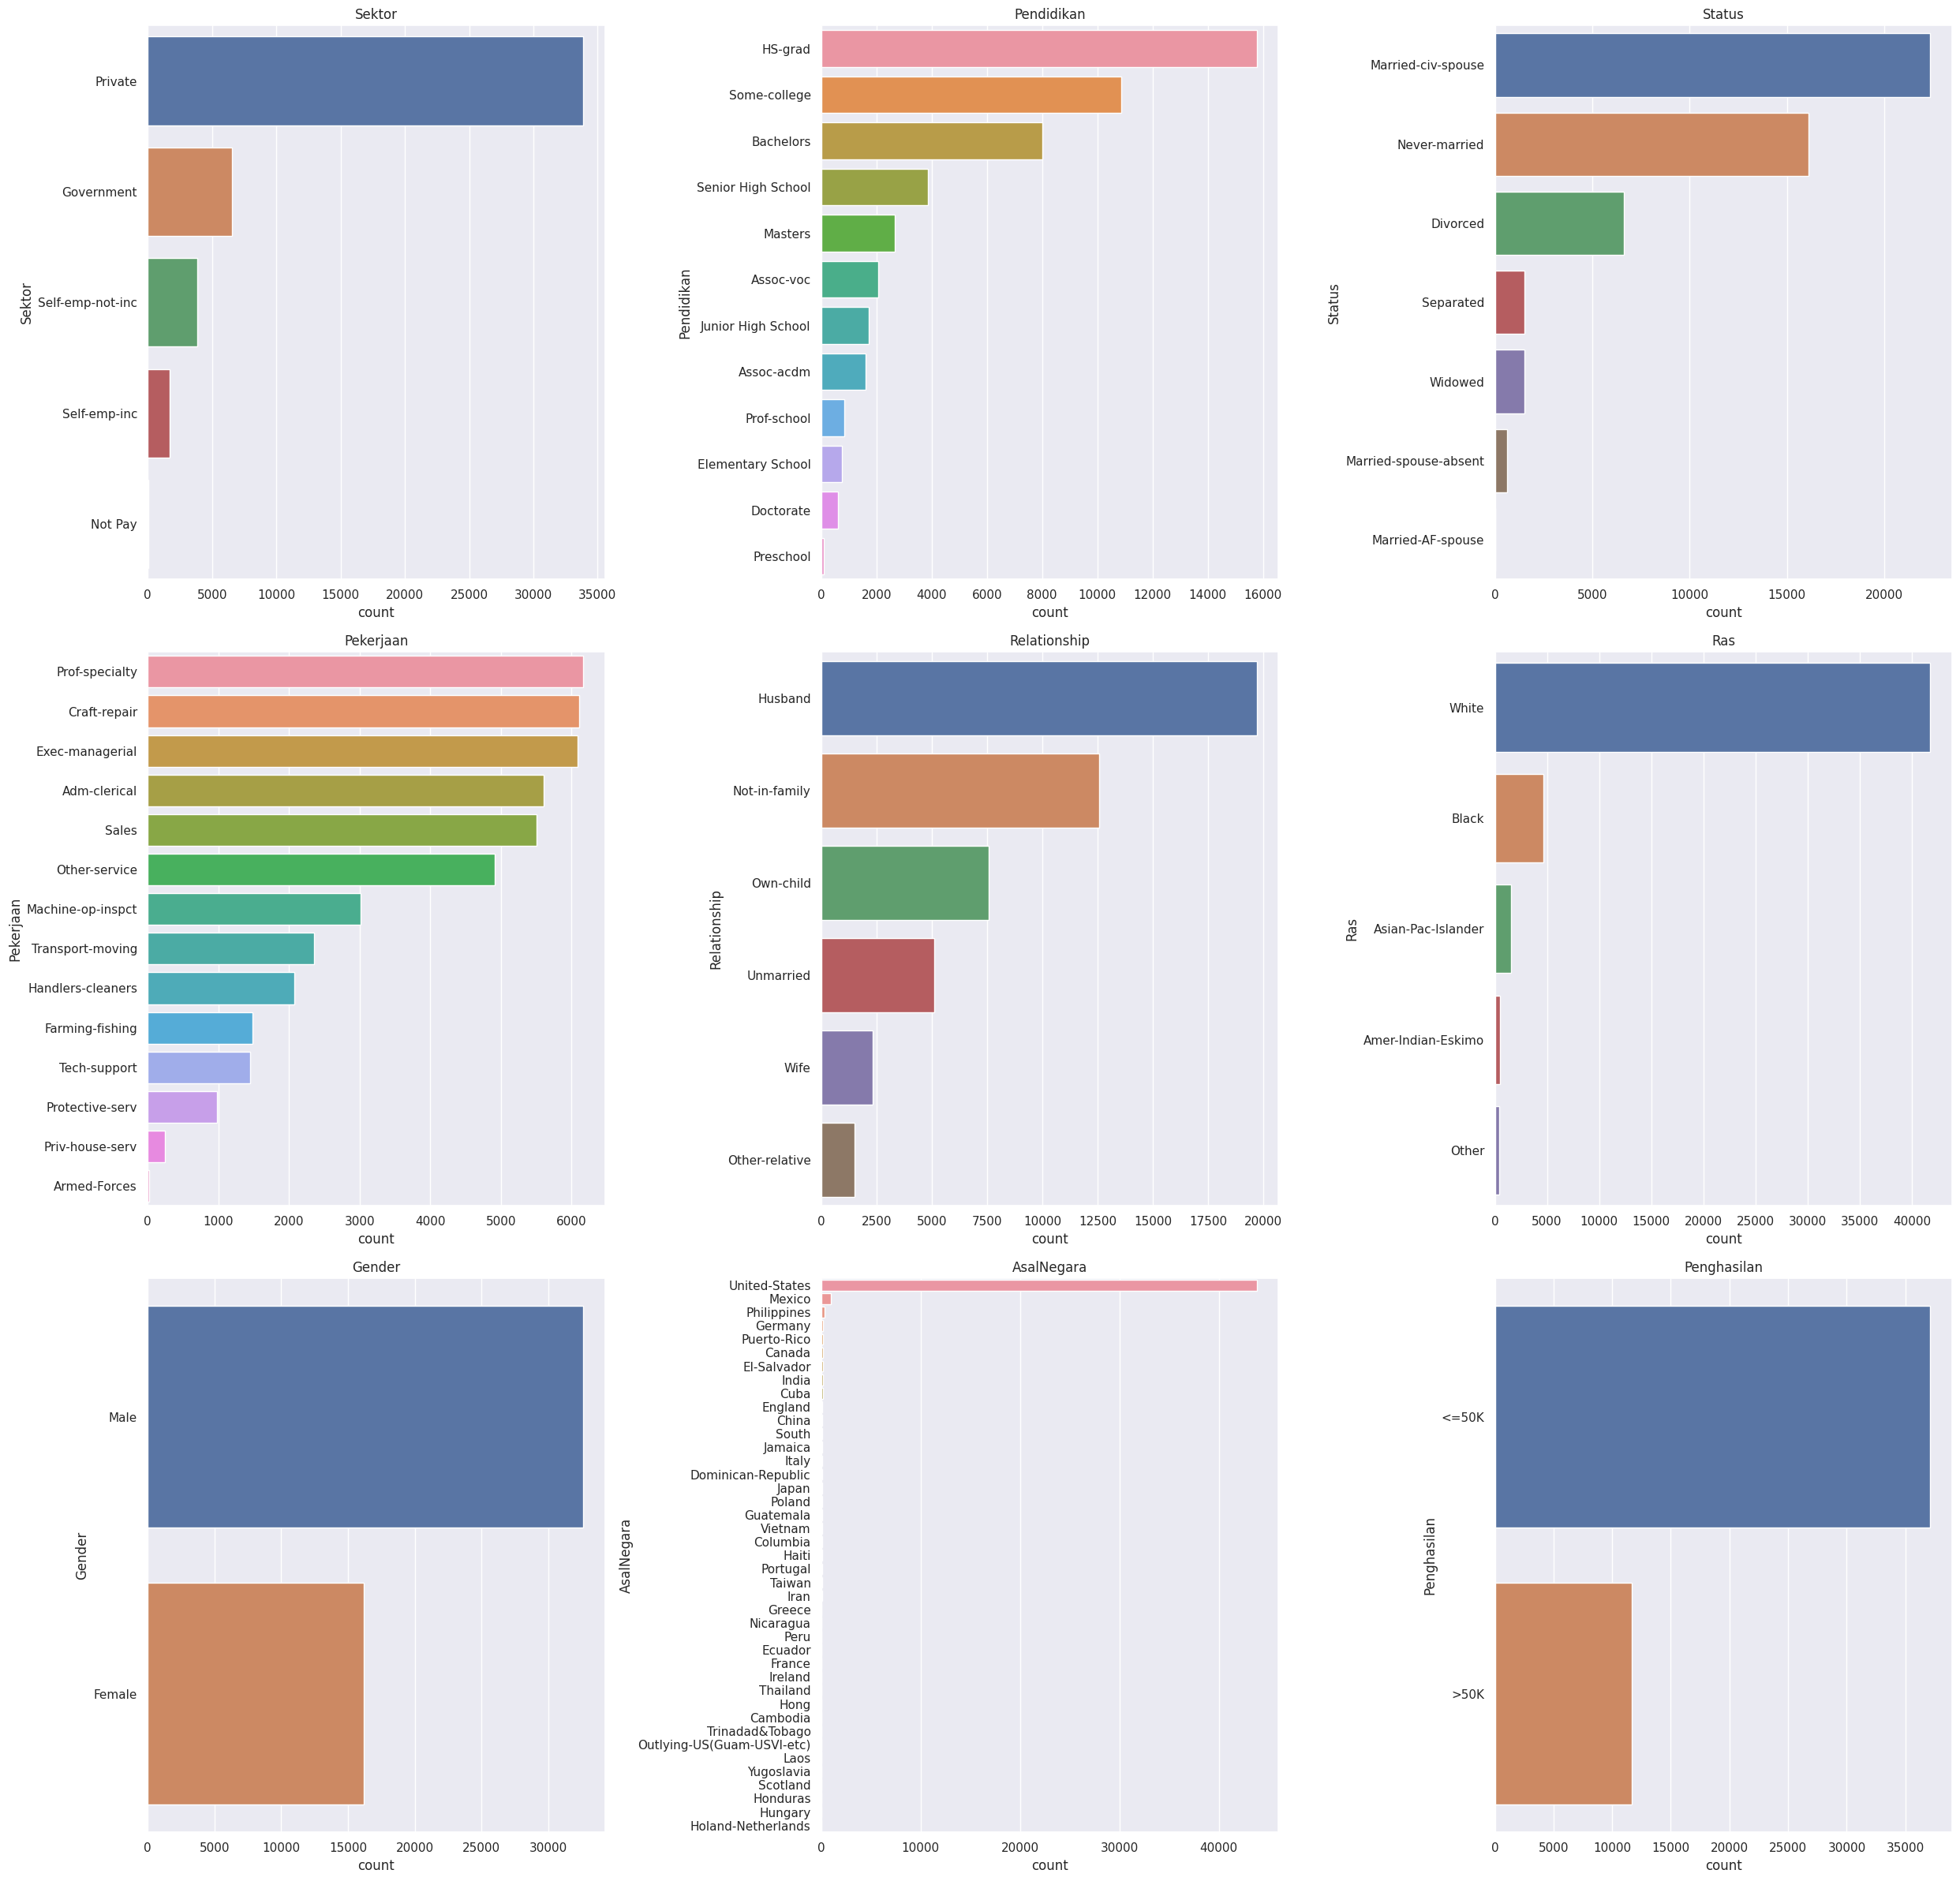

In [ ]:
catVar = df.select_dtypes(include = ['object', 'category'])
# Menghitung jumlah baris dan kolom subplot
num_variables = len(catVar.columns)
num_cols = 3  # Sesuaikan sesuai kebutuhan
num_rows = int(np.ceil(num_variables / num_cols))

# Membuat grid countplot dengan Seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 8 * num_rows))

# Menggunakan Seaborn untuk membuat countplot dalam grid
for i, ax in enumerate(axes.flatten()):
    if i < num_variables:
        col = catVar.columns[i]
        if catVar[col].dtype == 'bool':
            sns.countplot(y=col, data=catVar.astype({col: 'object'}), ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        else:
            sns.countplot(y=col, data=catVar, ax=ax, order=catVar.iloc[:, i].value_counts(ascending=False).index)
        ax.set_title(col)
    else:
        fig.delaxes(ax)

# Mengatur layout
plt.tight_layout()
plt.show()

### cek noise data numerik

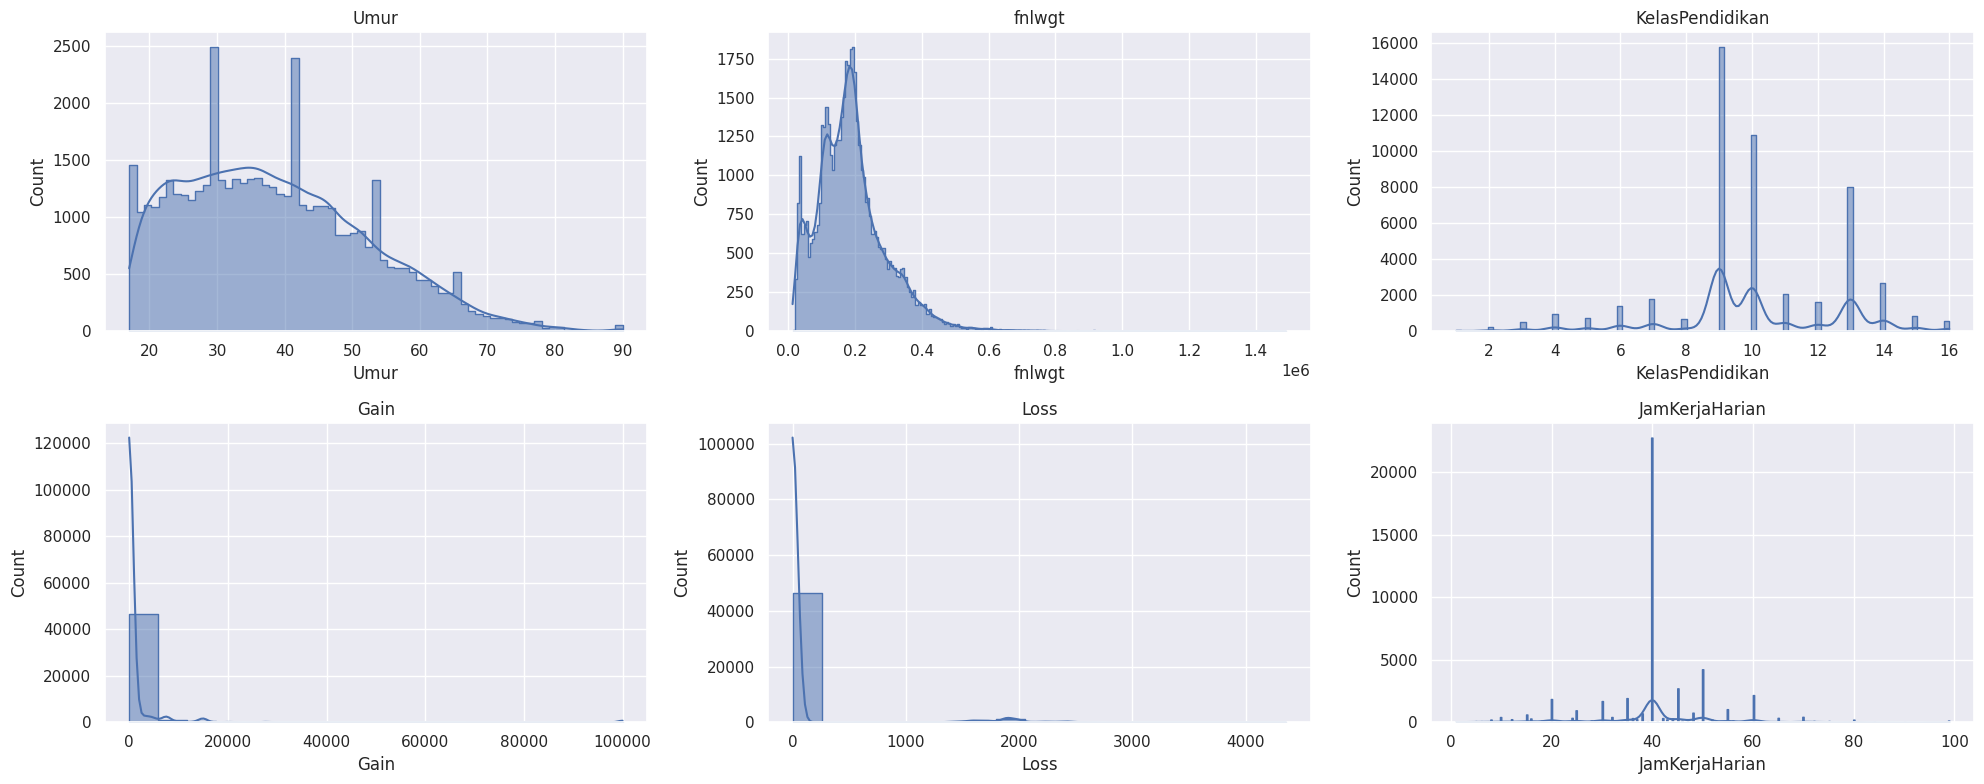

In [ ]:
# Membuat grid histogram dengan Seaborn
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Menggunakan Seaborn untuk membuat histogram dalam grid
for i in range(len(numVar.columns)):
    row, col = divmod(i, 3)
    sns.histplot(numVar.iloc[:, i], kde=True, ax=axes[row, col], element="step", stat="count", common_norm=False)
    axes[row, col].set_title(numVar.columns[i])

# Mengatur layout
plt.tight_layout()
plt.show()

## Age

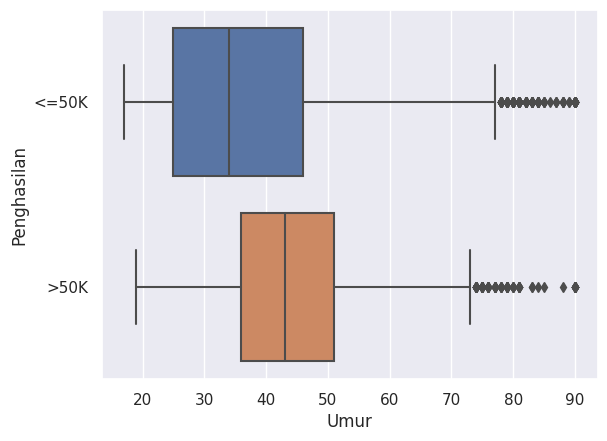

In [ ]:
# Visual Python: Visualization > Seaborn
p = sns.boxplot(x="Umur", y="Penghasilan", data=df)
plt.show()

Q1=28.0, Q3=48.0, IQR=20.0


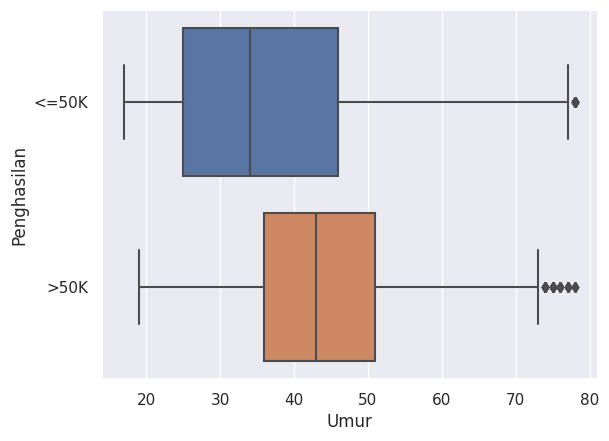

((48598, 15), (48813, 15))

In [ ]:
Q1 = df['Umur'].quantile(0.25)
Q3 = df['Umur'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

DfNoOutliers = df.drop(df[(df.Umur < Q1-1.5*IQR) | (df.Umur > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Umur", y="Penghasilan", data=DfNoOutliers)
plt.show()
DfNoOutliers.shape, df.shape

## Penghasilan yang diatas 50K, rata-rata umurnya antara 40 - 50

## Education Class

In [ ]:
df.head()

Umur            Sektor  fnlwgt          Pendidikan  KelasPendidikan  \
0    39        Government   77516           Bachelors               13   
1    50  Self-emp-not-inc   83311           Bachelors               13   
2    38           Private  215646             HS-grad                9   
3    53           Private  234721  Senior High School                7   
4    28           Private  338409           Bachelors               13   

               Status          Pekerjaan   Relationship    Ras  Gender  Gain  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  2174   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male     0   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male     0   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male     0   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female     0   

   Loss  JamKerjaHarian     AsalNegara Penghasilan  
0     0              40  United-States       <=50K  
1     0              13  United-States       <=50K  
2     0              40  United-States       <=50K  
3     0              40  United-States       <=50K  
4     0              40           Cuba       <=50K

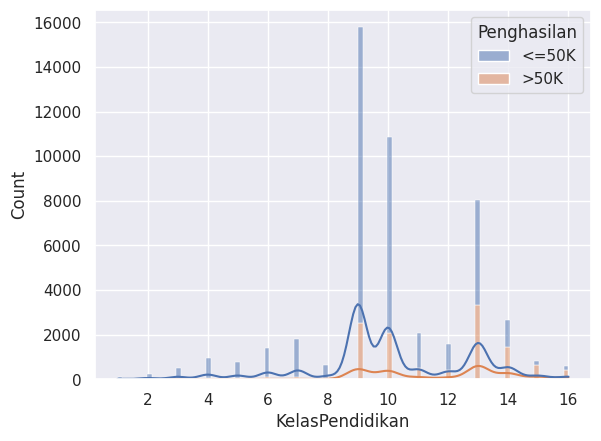

In [ ]:
p = sns.histplot(data=df, x= 'KelasPendidikan', hue= 'Penghasilan', multiple= 'stack', kde= True)
## Kelas pendidikan 9 memiliki distribusi penghasilan diatas 50K, kemudian 10, dan 13

In [ ]:
set(df['Pendidikan'])
df['Pendidikan'].unique()

['Bachelors', 'HS-grad', 'Senior High School', 'Masters', 'Junior High School', ..., 'Assoc-voc', 'Doctorate', 'Prof-school', 'Elementary School', 'Preschool']
Length: 12
Categories (12, object): ['Senior High School', 'Elementary School', 'Junior High School', 'Assoc-acdm',
                          ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

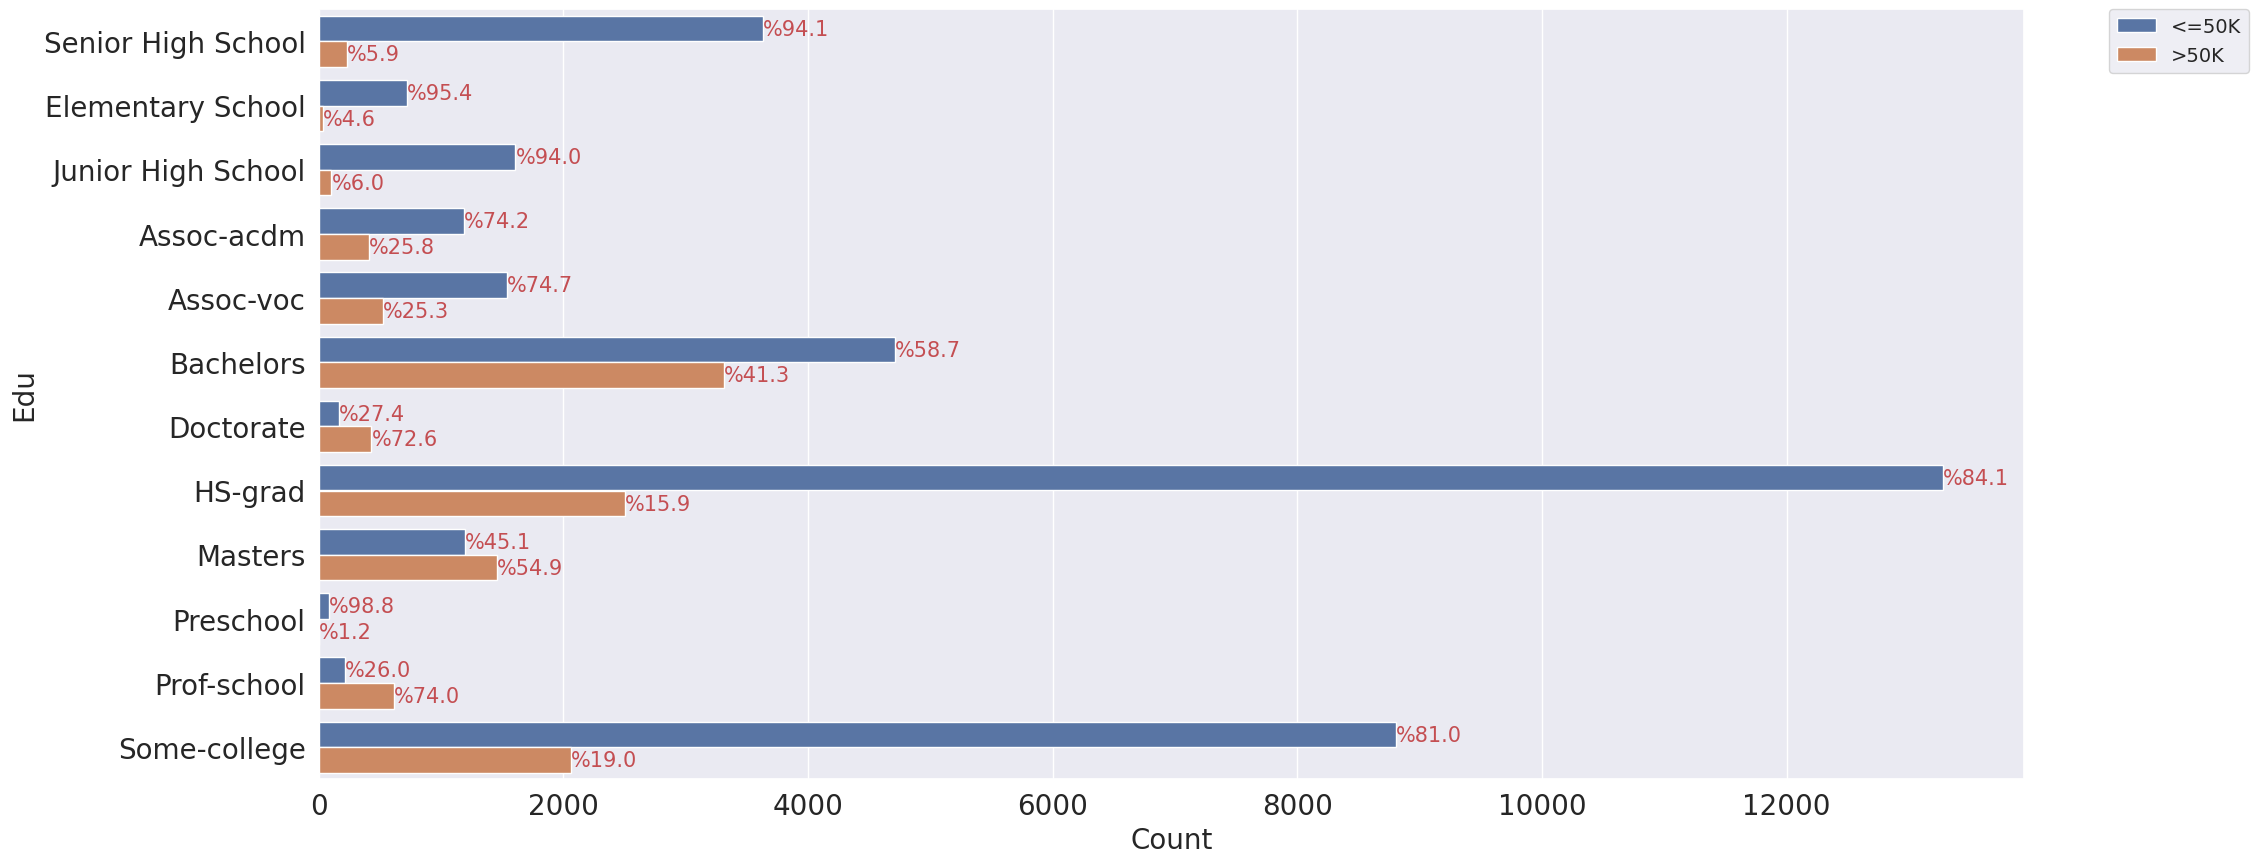

In [ ]:
df1 = pd.pivot_table(df,
              index='Pendidikan',
              columns='Penghasilan',
              aggfunc='size')
df1['perbandingan'] = df1['>50K'] / (df1['>50K'] + df1['<=50K'])
df1
import matplotlib.pyplot as plt
import seaborn as sns

total = float(df.shape[0])

sns.set(rc={'figure.figsize':(22,10)})

ax = sns.countplot(y="Pendidikan", hue="Penghasilan", data=df)

idx = df1.index.to_list()
n = 0
k = 0
# percentage of bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    # ax.text(i.get_width()+.12, i.get_y()+.3, '%' + str(round((i.get_width()/total)*100, 1)), fontsize=15, color='dimgrey')
    if n <= 11:
        ax.text(i.get_width()+.50, i.get_y()+.3, '%' + str(round(100-df1.loc[idx[n],'perbandingan']*100, 1)), fontsize=15, color='r')
        n += 1
    elif n >= 12:
        ax.text(i.get_width()+.50, i.get_y()+.3, '%' + str(round(df1.loc[idx[k],'perbandingan']*100, 1)), fontsize=15, color='r')
        n += 1
        k += 1

ax.set_ylabel('Edu',fontsize=20)
ax.set_xlabel('Count',fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
          prop={'size': 14})

## Penghasilan diatas 50K cenderung yang pendidikannya sampai Prof-school, Doctorate

## Sektor


In [ ]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="right",va="baseline")

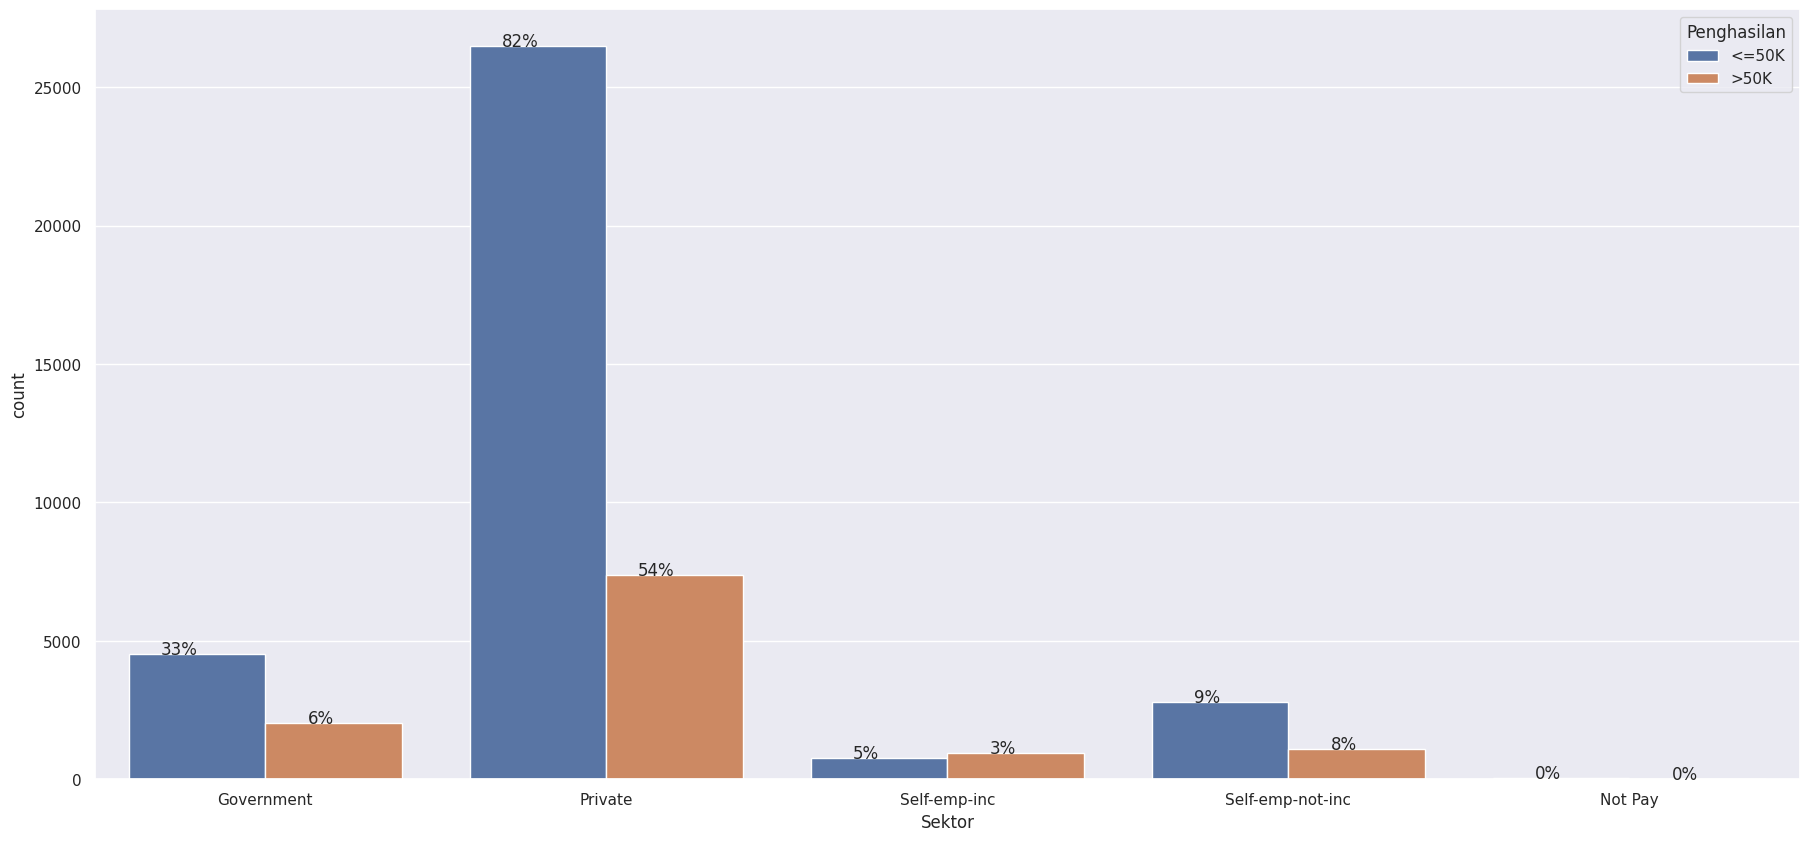

In [ ]:
ax = sns.countplot(x = 'Sektor', hue= 'Penghasilan', data=df)
barPerc(df, 'Penghasilan', ax)
## Sektor Private yang cenderung memiliki penghasilan diatas 50K sebesar 54%

## Occupation

In [ ]:
# set(df['Pekerjaan'])
df['Pekerjaan'].unique().value_counts

<bound method Categorical.value_counts of ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', ..., 'Tech-support', NaN, 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
Length: 15
Categories (14, object): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', ...,
                          'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']>

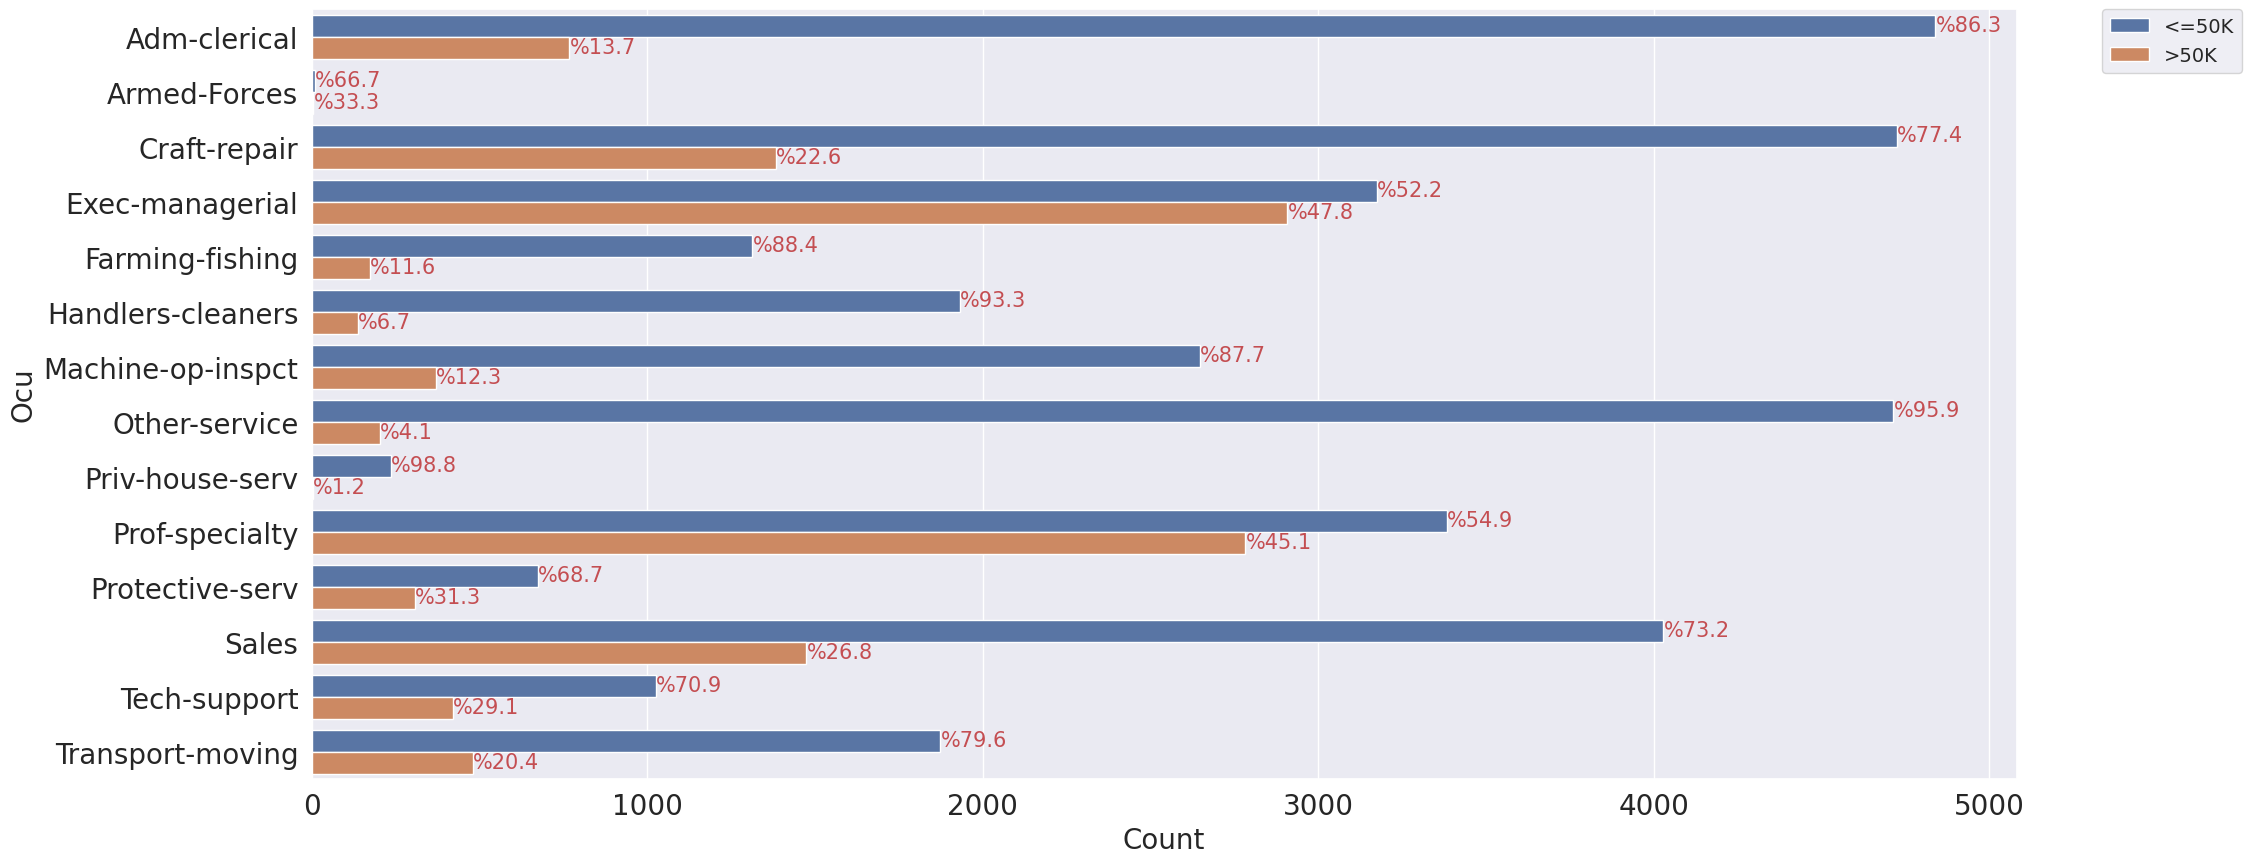

In [ ]:
df1 = pd.pivot_table(df,
              index='Pekerjaan',
              columns='Penghasilan',
              aggfunc='size')
df1['perbandingan'] = df1['>50K'] / (df1['>50K'] + df1['<=50K'])
df1
import matplotlib.pyplot as plt
import seaborn as sns

total = float(df.shape[0])

sns.set(rc={'figure.figsize':(22,10)})

ax = sns.countplot(y="Pekerjaan", hue="Penghasilan", data=df)

idx = df1.index.to_list()
n = 0
k = 0
# percentage of bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    # ax.text(i.get_width()+.12, i.get_y()+.3, '%' + str(round((i.get_width()/total)*100, 1)), fontsize=15, color='dimgrey')
    if n <= 13:
        ax.text(i.get_width()+.50, i.get_y()+.3, '%' + str(round(100-df1.loc[idx[n],'perbandingan']*100, 1)), fontsize=15, color='r')
        n += 1
    elif n >= 14:
        ax.text(i.get_width()+.50, i.get_y()+.3, '%' + str(round(df1.loc[idx[k],'perbandingan']*100, 1)), fontsize=15, color='r')
        n += 1
        k += 1

ax.set_ylabel('Ocu',fontsize=20)
ax.set_xlabel('Count',fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
          prop={'size': 14})

## Pekerjaan Exec-managerial yang memiliki persentase terbesar 47% yang mendapatkan penghasilan >50K

In [ ]:
df.tail()

Umur        Sektor  fnlwgt Pendidikan  KelasPendidikan  \
48837    39       Private  215419  Bachelors               13   
48838    64           NaN  321403    HS-grad                9   
48839    38       Private  374983  Bachelors               13   
48840    44       Private   83891  Bachelors               13   
48841    35  Self-emp-inc  182148  Bachelors               13   

                   Status        Pekerjaan    Relationship  \
48837            Divorced   Prof-specialty   Not-in-family   
48838             Widowed              NaN  Other-relative   
48839  Married-civ-spouse   Prof-specialty         Husband   
48840            Divorced     Adm-clerical       Own-child   
48841  Married-civ-spouse  Exec-managerial         Husband   

                      Ras  Gender  Gain  Loss  JamKerjaHarian     AsalNegara  \
48837               White  Female     0     0              36  United-States   
48838               Black    Male     0     0              40  United-States   
48839               White    Male     0     0              50  United-States   
48840  Asian-Pac-Islander    Male  5455     0              40  United-States   
48841               White    Male     0     0              60  United-States   

      Penghasilan  
48837       <=50K  
48838       <=50K  
48839       <=50K  
48840       <=50K  
48841        >50K

## Status

In [ ]:
df1 = pd.pivot_table(df,
              index='Status',
              columns='Penghasilan',
              aggfunc='size')
df1['perbandingan'] = df1['>50K'] / (df1['>50K'] + df1['<=50K'])
df1

# Married-AF-spouse & Married-civ-spouse digabung menjadi Married-spouse karena perbandingan >50K cukup besar

Penghasilan            <=50K  >50K  perbandingan
Status                                          
Divorced                5959   671      0.101207
Married-AF-spouse         23    14      0.378378
Married-civ-spouse     12390  9982      0.446183
Married-spouse-absent    570    58      0.092357
Never-married          15365   733      0.045534
Separated               1431    99      0.064706
Widowed                 1390   128      0.084321

In [ ]:
df['Status'] = df ['Status'].apply (lambda x : 'Married-spouse' if str(x) in ['Married-AF-spouse', 'Married-civ-spouse'] else str(x))
df.Status.unique()

array(['Never-married', 'Married-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Widowed'], dtype=object)

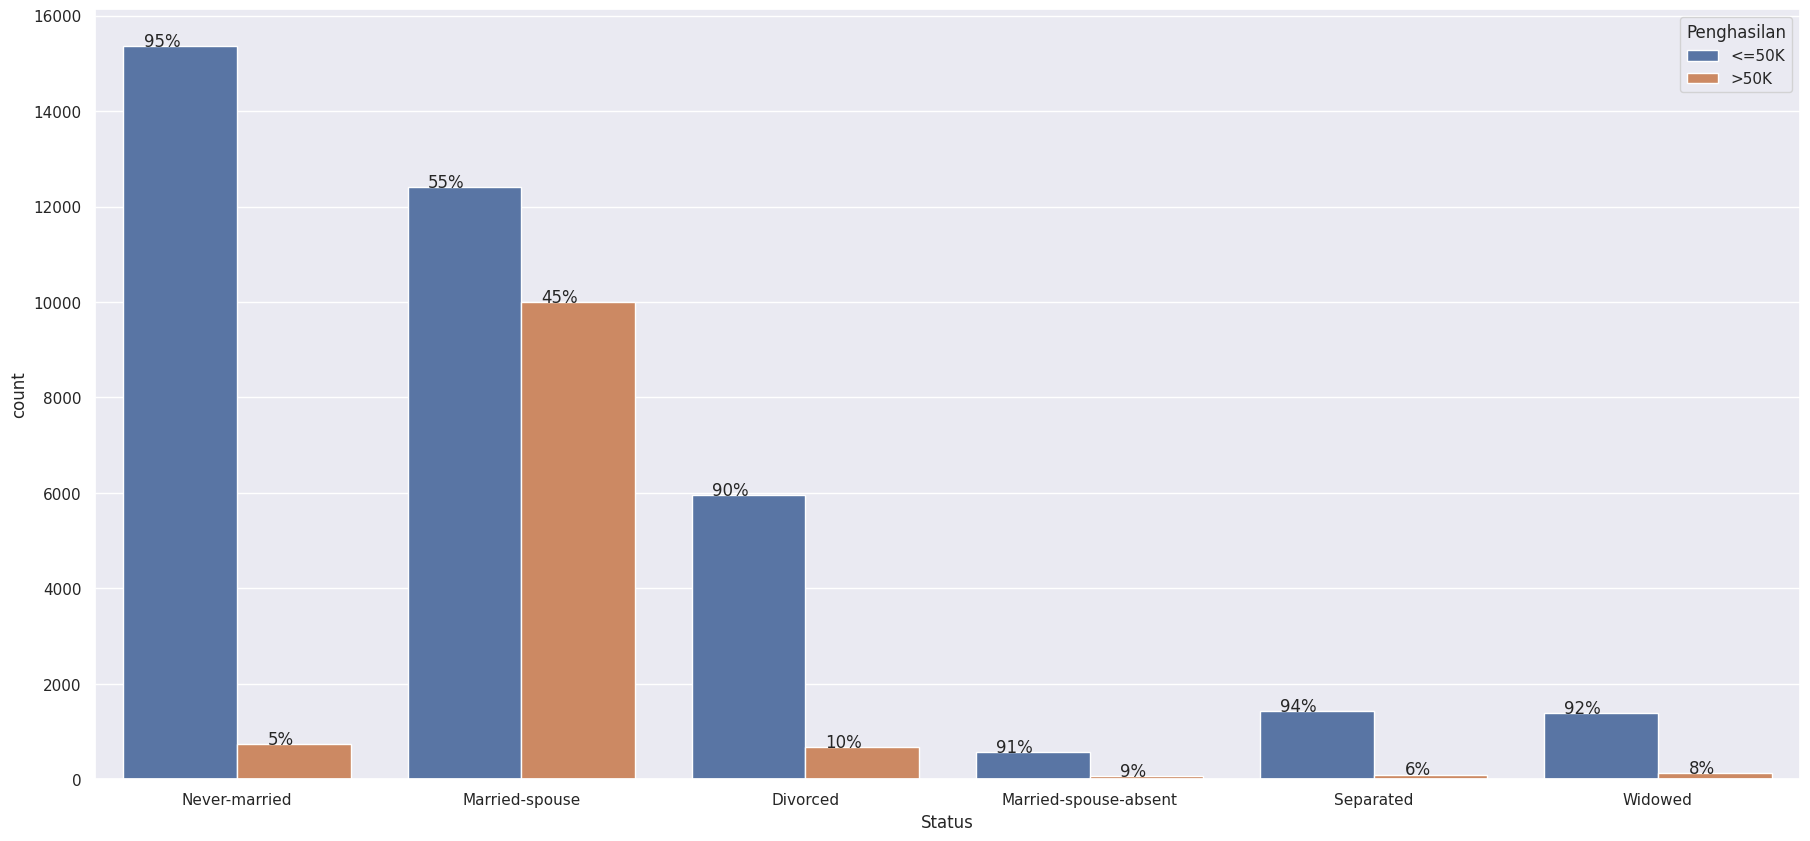

In [ ]:
ax = sns.countplot(x = 'Status', hue= 'Penghasilan', data=df)
barPerc(df, 'Status', ax)

#Pasangan married menunjukan persentase tertinggi sebesar 45% yang penghasilannya >50K

## Relationship

<Axes: xlabel='Relationship', ylabel='Count'>

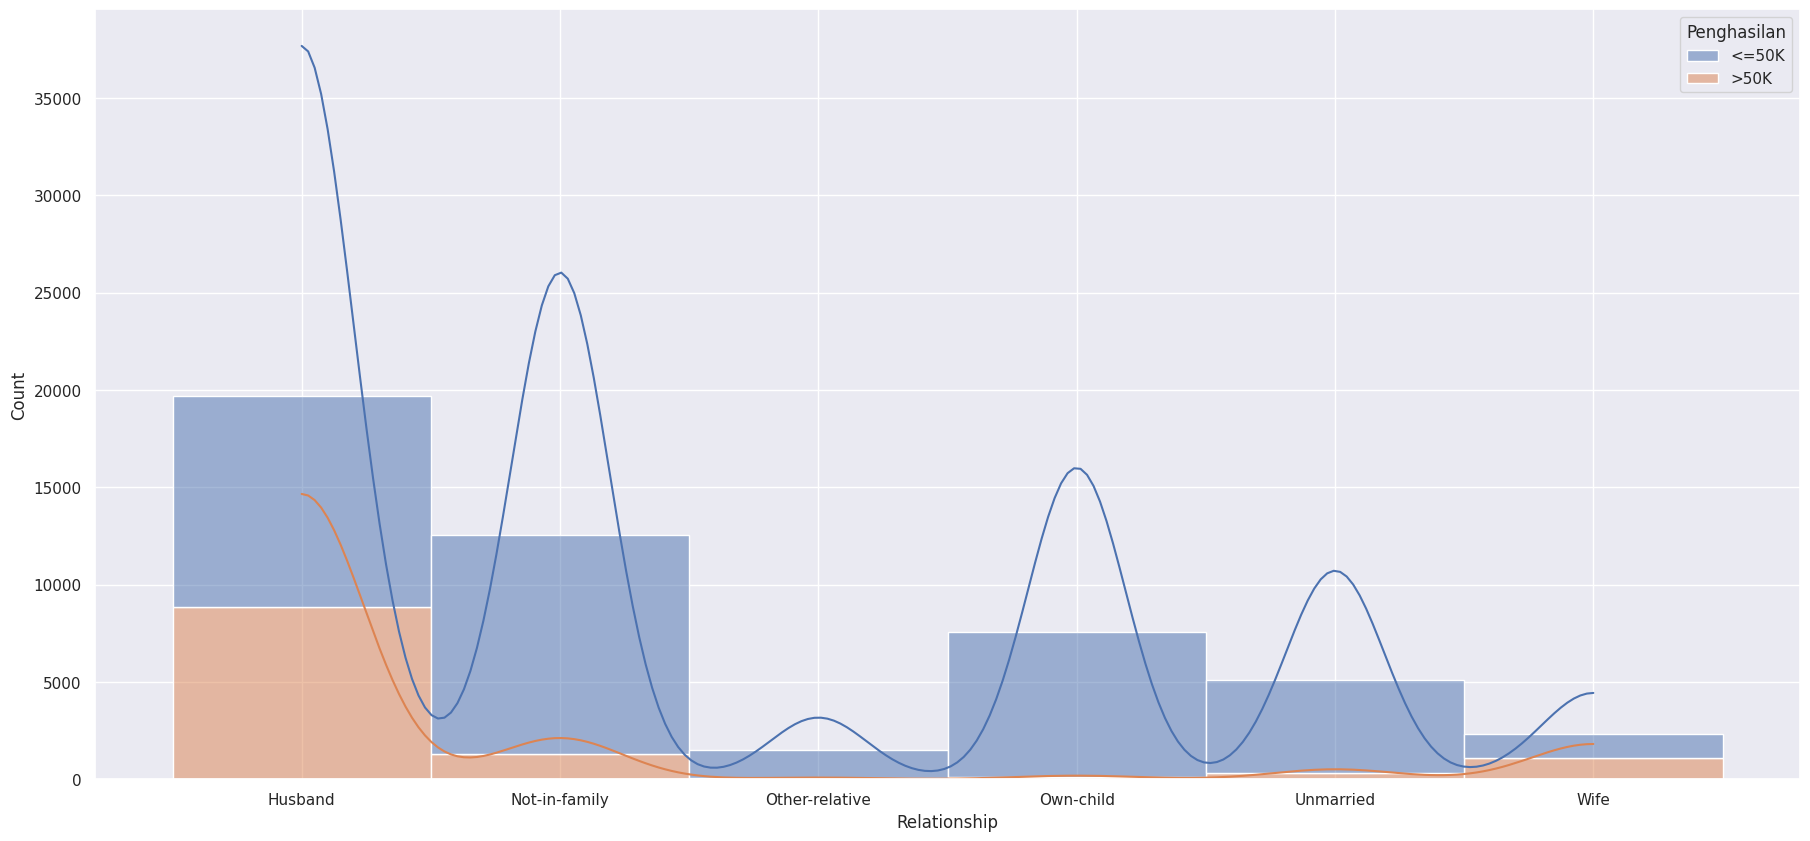

In [ ]:
sns.histplot(data = df, x = 'Relationship', hue = 'Penghasilan', multiple = 'stack', kde = True)
# Husband yang paling banyak menghasilkan >50K

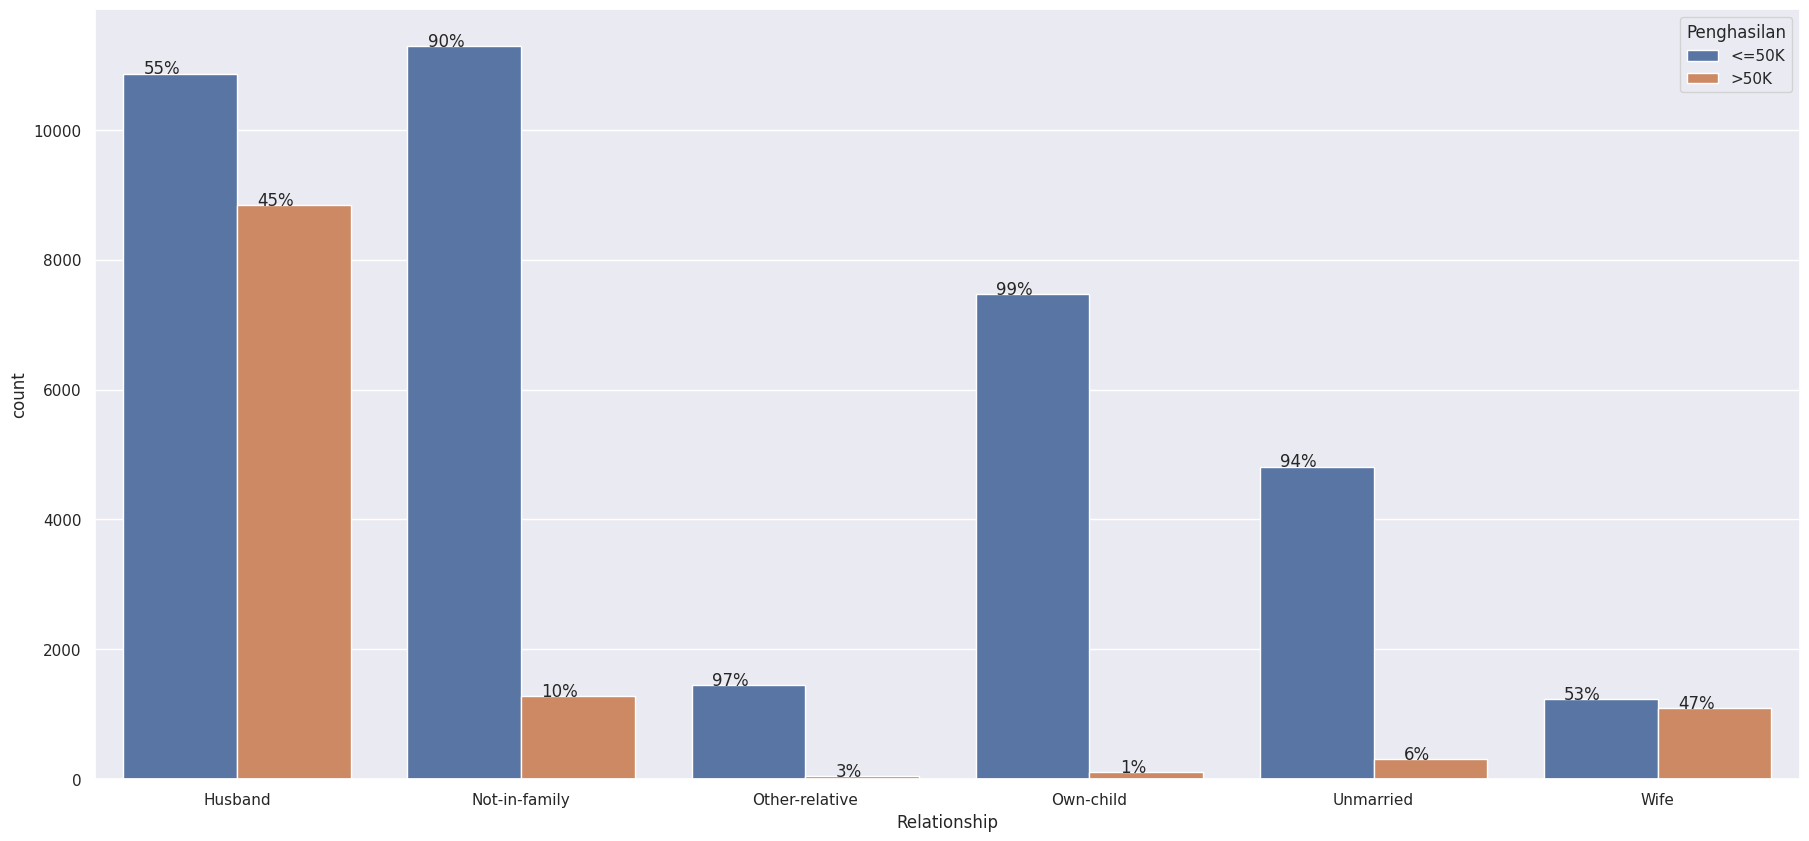

In [ ]:
ax = sns.countplot(x = 'Relationship', hue= 'Penghasilan', data=df)
barPerc(df, 'Relationship', ax)
# Namun persentase yang paling tinggi menghasilkan >50K adalah Wife

##Ras

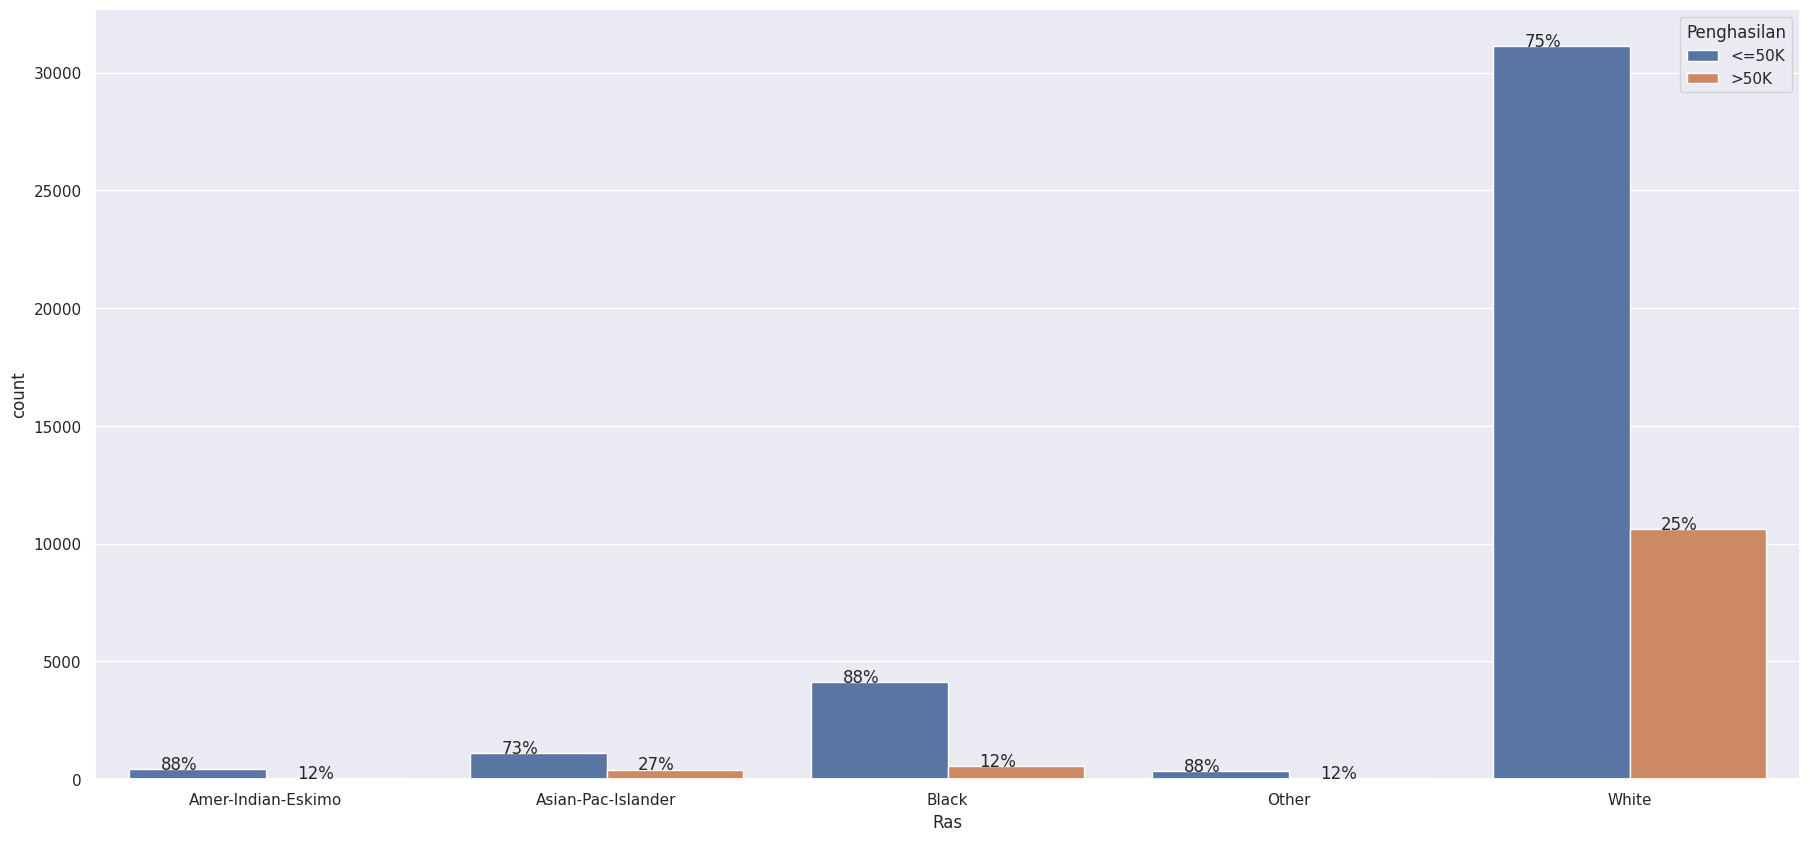

In [ ]:
ax = sns.countplot(x = 'Ras', hue= 'Penghasilan', data=df)
barPerc(df, 'Ras', ax)
# Penghasilan >50K yang paling banyak ras putih, namun persentase terbesarnya yaitu ras Asian-Pas-Islander

## Asal Negara

In [ ]:
#set(df['AsalNegara'])
#df['Pekerjaan'].unique().value_counts
df['AsalNegara'].unique().value_counts

<bound method Categorical.value_counts of ['United-States', 'Cuba', 'Jamaica', 'India', NaN, ..., 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']
Length: 42
Categories (41, object): ['Cambodia', 'Canada', 'China', 'Columbia', ..., 'Trinadad&Tobago',
                          'United-States', 'Vietnam', 'Yugoslavia']>

In [ ]:
df1 = pd.pivot_table(df,
              index='AsalNegara',
              columns='Penghasilan',
              aggfunc='size')
df1['perbandingan'] = df1['>50K'] / (df1['>50K'] + df1['<=50K'])
df1.sort_values(by = 'perbandingan', ascending= False, inplace= True)
df1

Penghasilan                 <=50K   >50K  perbandingan
AsalNegara                                            
France                         22     16      0.421053
India                          89     62      0.410596
Taiwan                         39     26      0.400000
Iran                           37     22      0.372881
England                        80     47      0.370079
Greece                         31     18      0.367347
Yugoslavia                     15      8      0.347826
Japan                          60     32      0.347826
Canada                        119     63      0.346154
Italy                          71     34      0.323810
Cambodia                       19      9      0.321429
Hungary                        13      6      0.315789
Ireland                        26     11      0.297297
China                          86     36      0.295082
Philippines                   210     85      0.288136
Germany                       148     58      0.281553
Hong                           22      8      0.266667
Cuba                          104     34      0.246377
United-States               33118  10692      0.244054
Poland                         70     17      0.195402
Portugal                       55     12      0.179104
South                          95     20      0.173913
Thailand                       25      5      0.166667
Scotland                       18      3      0.142857
Jamaica                        91     15      0.141509
Ecuador                        39      6      0.133333
Haiti                          66      9      0.120000
Puerto-Rico                   164     20      0.108696
Honduras                       18      2      0.100000
Peru                           42      4      0.086957
Laos                           21      2      0.086957
Vietnam                        79      7      0.081395
Trinadad&Tobago                25      2      0.074074
El-Salvador                   144     11      0.070968
Nicaragua                      46      3      0.061224
Mexico                        900     47      0.049630
Dominican-Republic             98      5      0.048544
Columbia                       81      4      0.047059
Outlying-US(Guam-USVI-etc)     22      1      0.043478
Guatemala                      83      3      0.034884
Holand-Netherlands              1      0      0.000000

##Gender dan Umur

In [ ]:
df1 = pd.pivot_table(df,
              index='Gender',
              columns='Penghasilan',
              aggfunc='size')
df1['perbandingan'] = df1['>50K'] / (df1['>50K'] + df1['<=50K'])
df1
#Persentase Male sebesar 30.3% yang memiliki penghasilan >50K

Penghasilan  <=50K  >50K  perbandingan
Gender                                
Female       14413  1769      0.109319
Male         22715  9916      0.303883

<Axes: xlabel='Penghasilan', ylabel='Umur'>

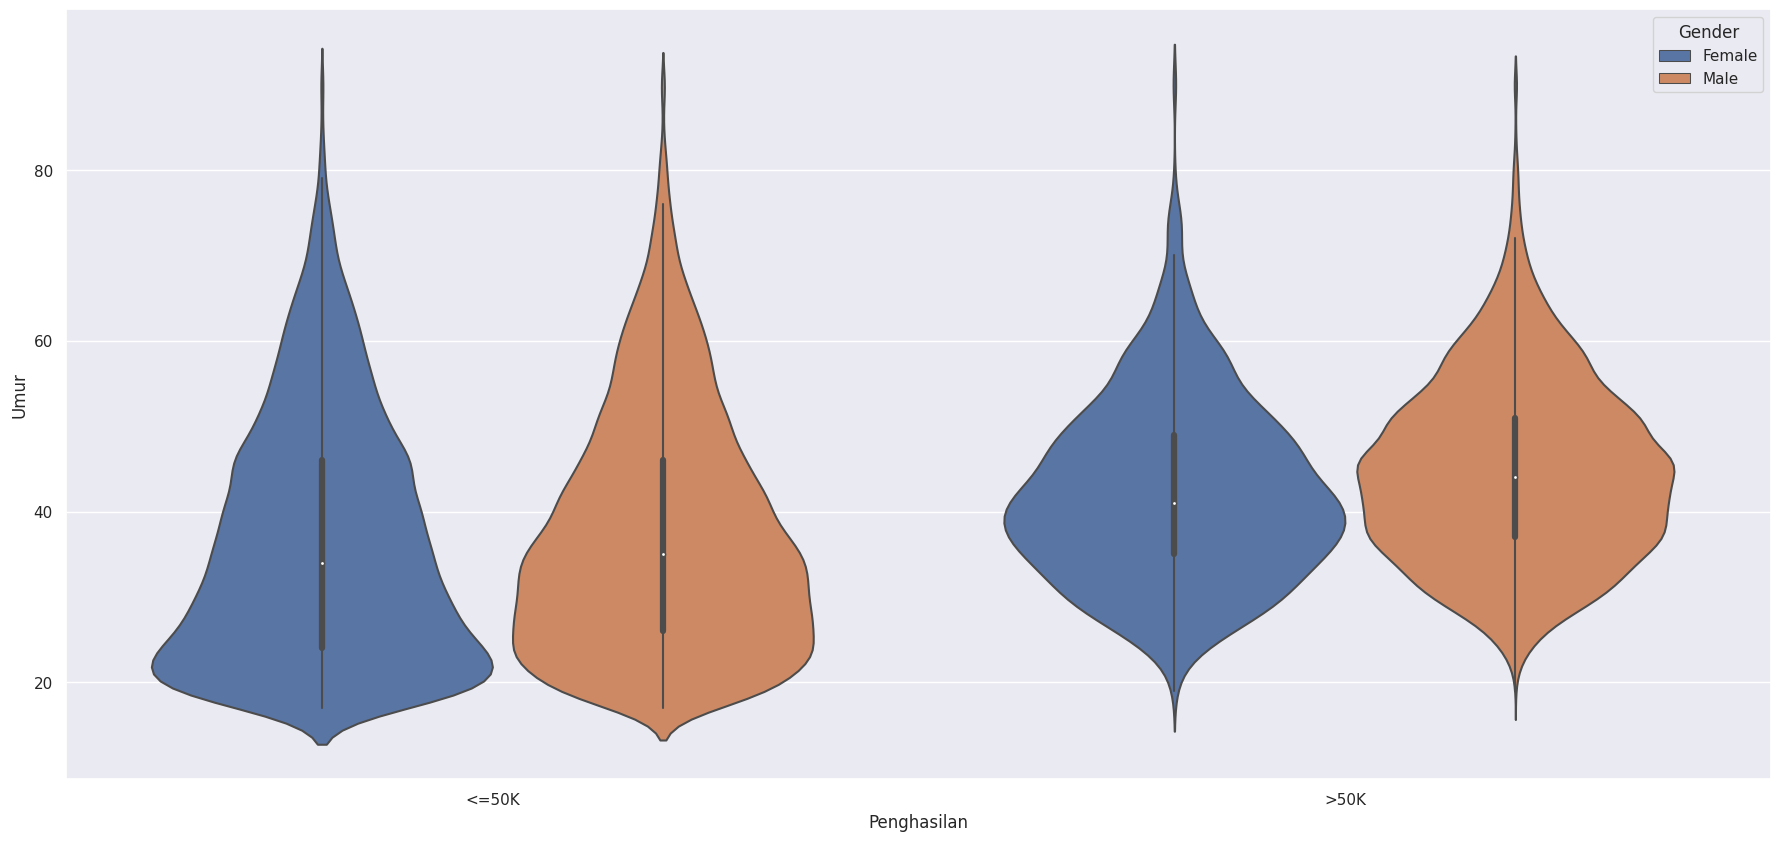

In [ ]:
sns.violinplot(data= df, x = 'Penghasilan', y= 'Umur', hue = 'Gender')

#RMale memiliki penghasilan >50K lebih banyak dengan rata-rata umur diatas 40 tahun

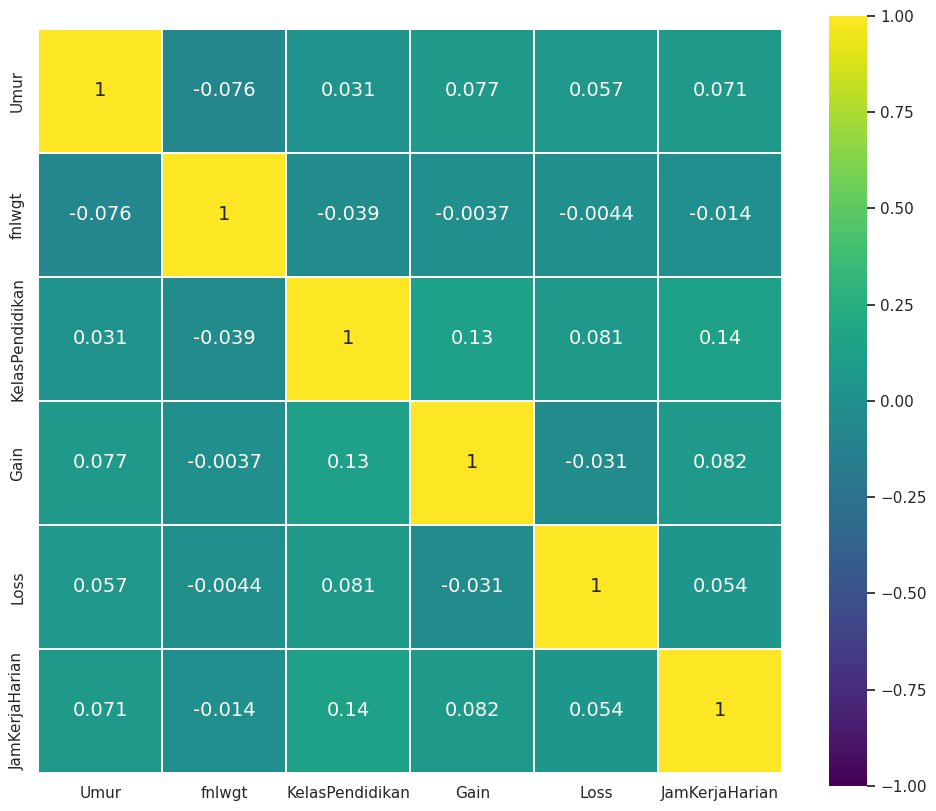

In [ ]:
kor = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(kor[(kor > 0.5) | (kor <= 0.4)],
            cmap= 'viridis', vmax=1.0, vmin=-1.0, linewidths= 0.1,
            annot = True, annot_kws= {'size':14}, square=True);


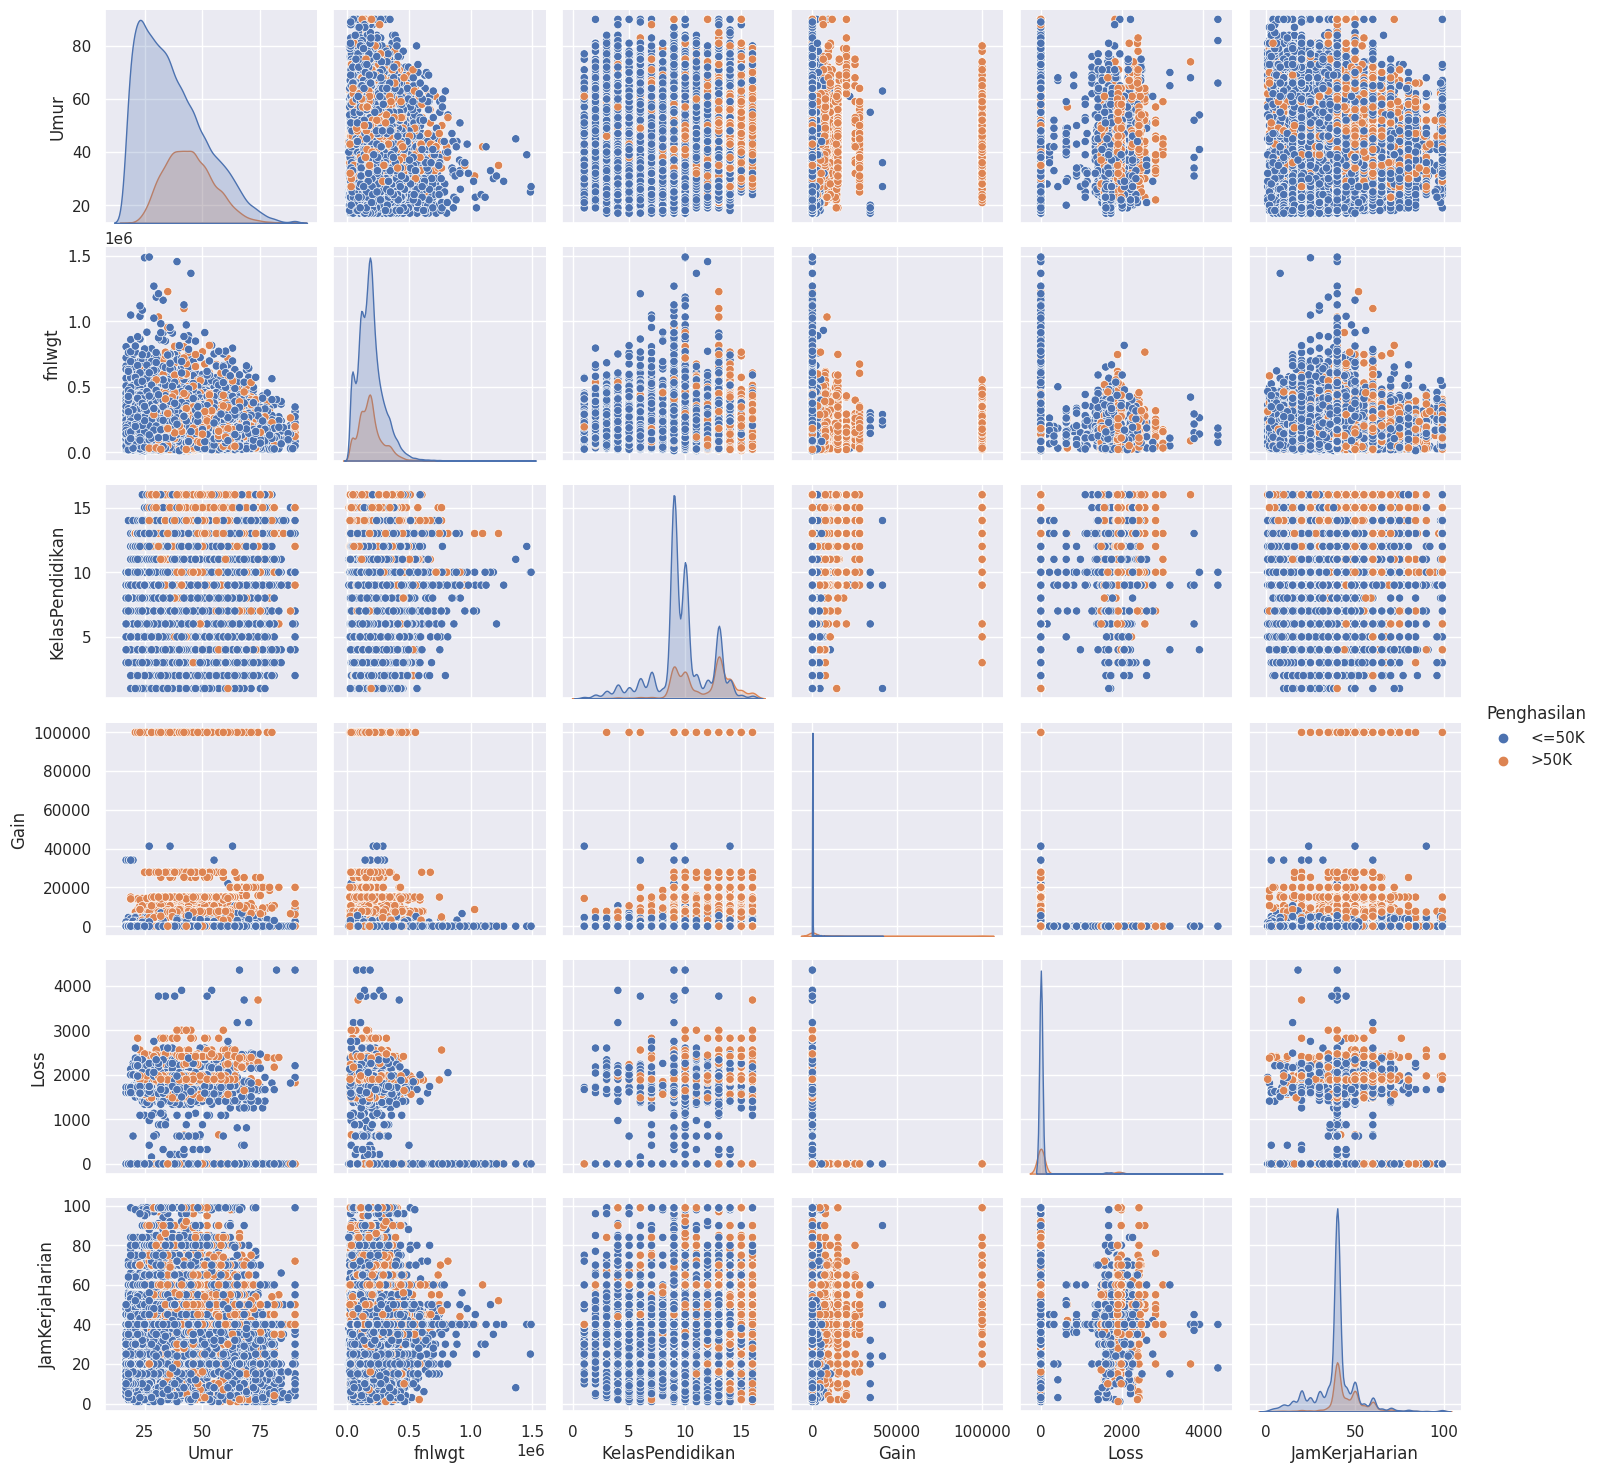

In [ ]:
s = sns.pairplot(df, hue='Penghasilan')
## H: yang paling berpengaruh terhadap penghasilan >50K adalah gain (investasi-->passive income)

##Jam Kerja Harian (Anomali)

<Axes: xlabel='JamKerjaHarian', ylabel='Count'>

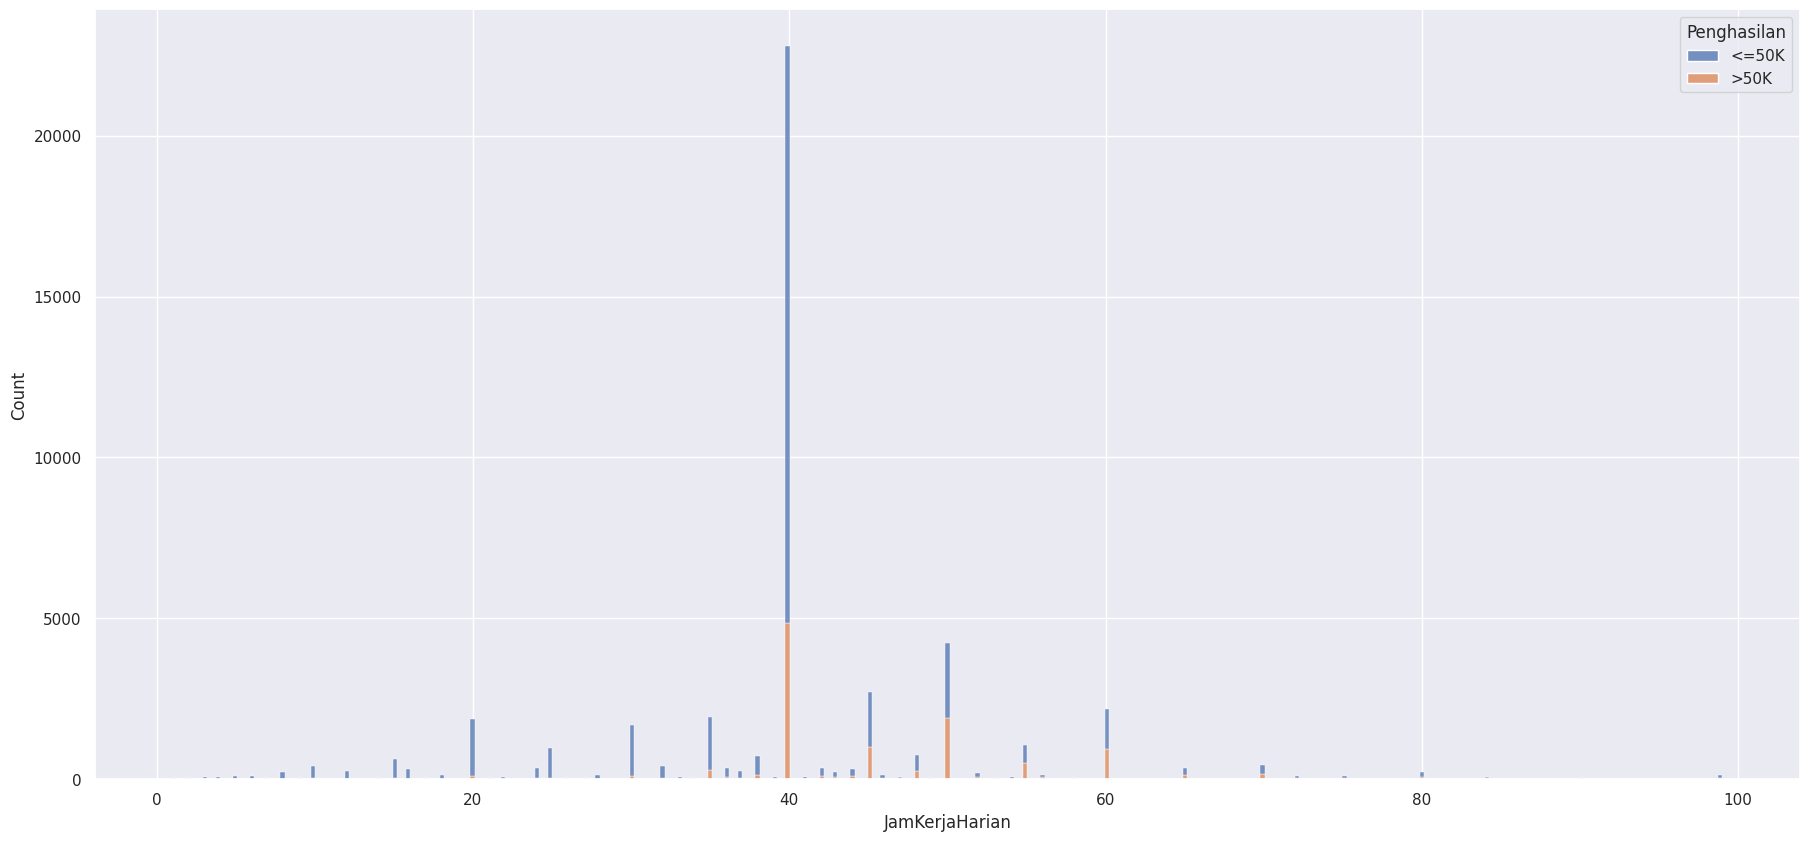

In [ ]:
sns.histplot(data = df, x = 'JamKerjaHarian', hue = 'Penghasilan', multiple = 'stack', kde = False)

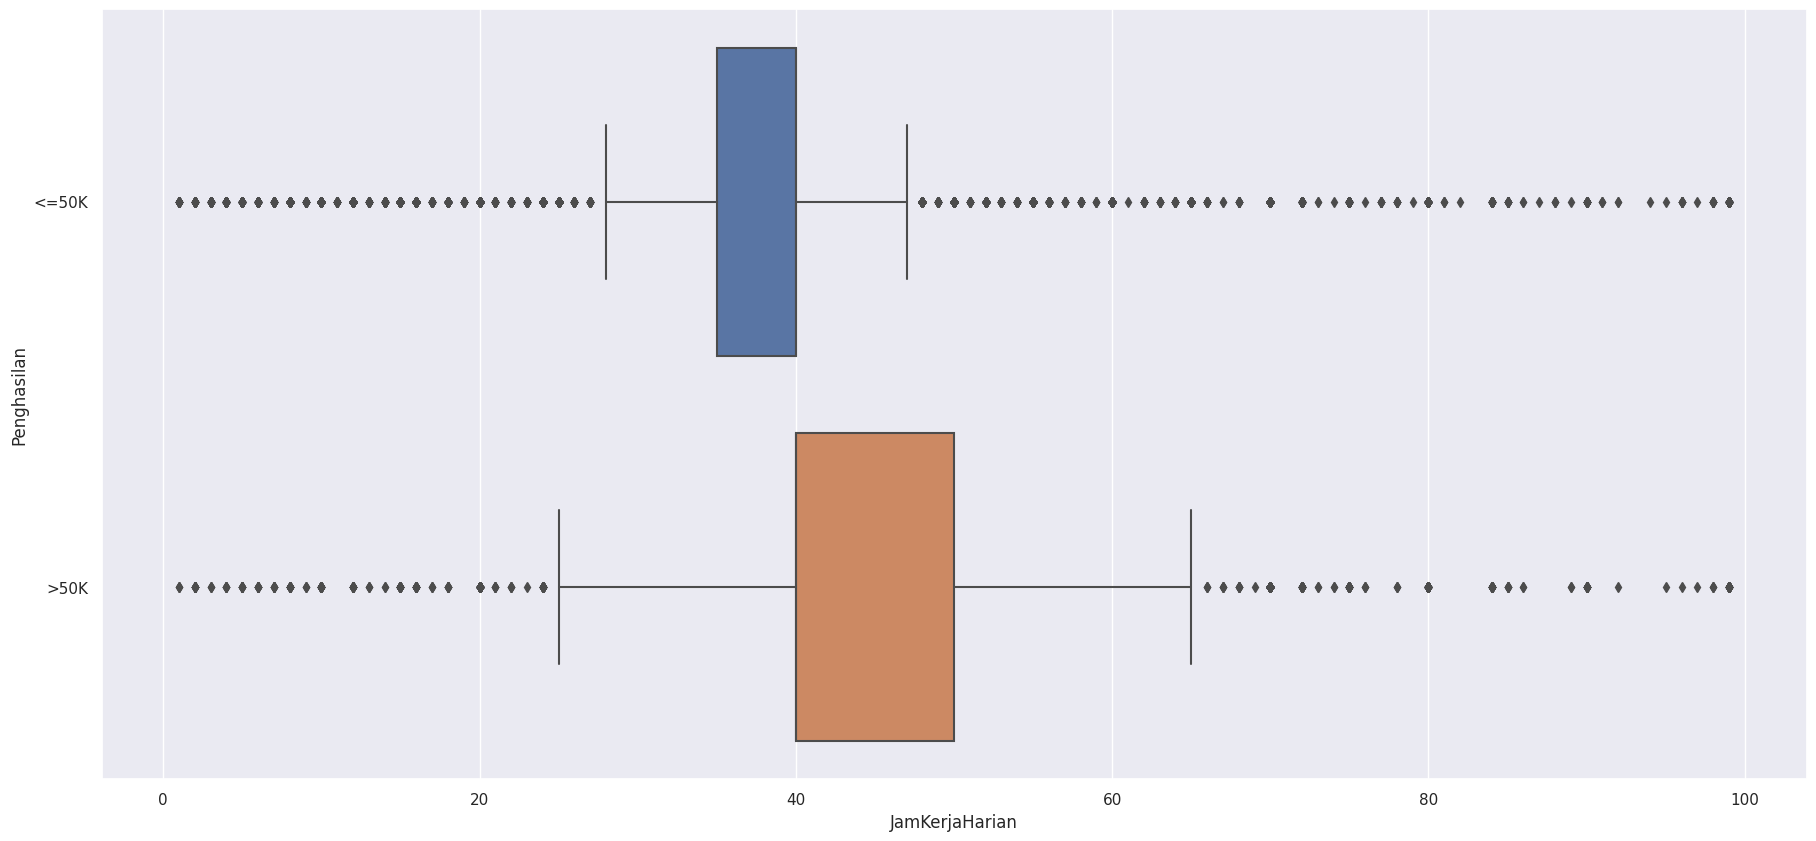

In [ ]:
p = sns.boxplot(x="JamKerjaHarian", y="Penghasilan", data=df)
plt.show()
## Terdapat banyak noise

**Menangani Missing Value**

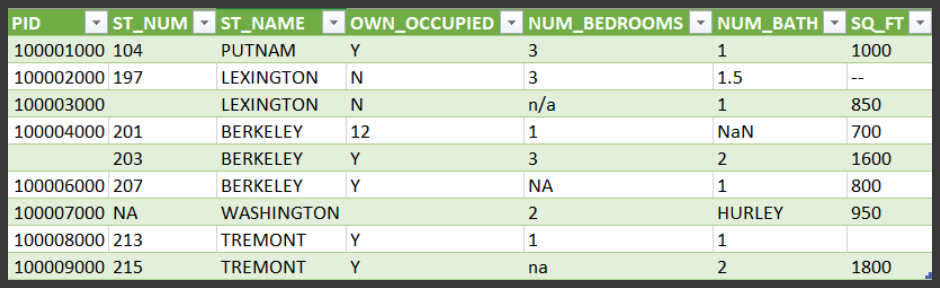

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 05: Missing Values</font></strong></h1></center>
    
Salah satu proses dalam data preprocessing adalah mengidentifikasi dan menangani *missing value*, apa itu *missing value*? *Missing value* adalah istilah untuk data yang hilang

## <font color="green">Penyebab Missing Value</font>
*   Error pada *data entry*, baik itu *human error*, kesalahan pada sistem, atau hardware/software fault.
*   Pada data survey/kuesioner, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif
* permasalahan yang dihadapi pada data di dunia nyata adalah, terkadang penandaan untuk mengatakan bahwa data tersebut *missing* sangat beragam, bisa ditulis ‘?’ (tanda tanya), bisa ditulis ‘-‘ (strip), bisa suatu bilangan yang sangat besar atau sangat kecil (misal 99 atau -999), di kosongkan, NaN, dsb.
### <font color="green">Langkah pertama penanganan MV adalah dengan melakukan EDA, terutama mengetahui berapa banyak proporsi data yang Missing.</font>

Perhatikan bahwa data ini memiliki berbagai macam cara untuk mengatakan bahwa data pada *cell* tertentu adalah *missing*, misalnya:

*   *cell*nya dikosongkan
*   ditulis dengan n/a, NA, na, ataupun NaN
*   ditulis dengan symbol –
*   ataupun mempunyai nilai yang cukup aneh seperti nilai 12 pada kolom OWN_OCCUPIED, ataupun HURLEY pada kolom NUM_BATH

Ketika kita meng-load data ini ke python menggunakan pandas, beberapa notasi *missing* yang umum [otomatis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) dikategorikan sebagai NaN (notasi *missing value* pada python)

* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

Menangani Missing Values : https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

*Metode Deletion*

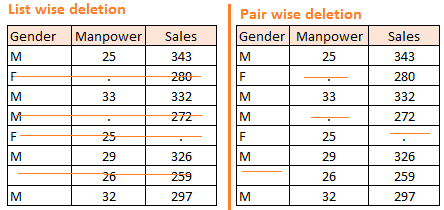

Mengabaikan Missing Value

* Beberapa algoritma machine learning atau metode analisis lainnya memiliki kemampuan internal model/algoritma untuk  menangani missing value, contohnya adalah decision tree, k-Nearest Neighbors (k-NN), Neural network yang dapat mengimputasi sendiri missing value pada data.

* Ataupun jika ada beberapa kolom yang tidak memberikan informasi apa apa, kita dapat membiarkan missing value ada di kolom tersebut karena kolom tersebut pun tidak memberikan informasi yang signifikan, contohnya adalah nomor tiket pada data penumpang kereta api, kita tidak perlu sulit-sulit memikirkan bagaimana cara mengimputasi kolom tersebut. Cukup drop kolom tersebut.


### <center><font color="blue"> Tipe Missing Value</font></center>
<font color="green">Langkah kedua penanganan MV adalah meneliti bagaimana MV terdistribusi (tipe MV).</font>
<img alt="" src="images/Missing value analysis mva.jpeg" style="height: 200px;" />

* **MCAR(Missing Completely at Random)**: Data hilang secara acak, dan tidak berkaitan dengan variabel/mekanisme apapun.
    - **Contoh**: Beberapa peserta workshop tidak hadir karena alasan masing-masing dan mereka tidak saling berkomunikasi.

* **MAR(Missing at Random)**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing
    - **Contoh**: Karena akhir tahun & banyak deadline, sehingga banyak karyawan yang memilih mengerjakan laporan ketimbang ikut workshop.

* **MNAR(Missing not at Random)**: Terdapat hubungan sistematis antara kecenderungan data yang missing dan yang tidak missing, dan juga dengan (harapan nilai) missing value itu sendiri.
    - **Contoh**: Siswa yang memiliki orang tua dengan penghasilan dibawah rata-rata akan lebih sungkan mengisi form yang menanyakan penghasilan orang tua. Apalagi kalau jawabannya harus berupa angka eksak (bukan pilihan berupa interval). Pada siatuasi ini tidak hanya data berpotensi missing, tapi juga berpotensi untuk menurunkan kualitas data (siswa berbohong).

In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())

Umur                  0
Sektor             2799
fnlwgt                0
Pendidikan            0
KelasPendidikan       0
Status                0
Pekerjaan          2809
Relationship          0
Ras                   0
Gender                0
Gain                  0
Loss                  0
JamKerjaHarian        0
AsalNegara          856
Penghasilan           0
dtype: int64


In [ ]:
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

persentase missing
Umur                       0.000000
Sektor                     5.734128
fnlwgt                     0.000000
Pendidikan                 0.000000
KelasPendidikan            0.000000
Status                     0.000000
Pekerjaan                  5.754615
Relationship               0.000000
Ras                        0.000000
Gender                     0.000000
Gain                       0.000000
Loss                       0.000000
JamKerjaHarian             0.000000
AsalNegara                 1.753631
Penghasilan                0.000000

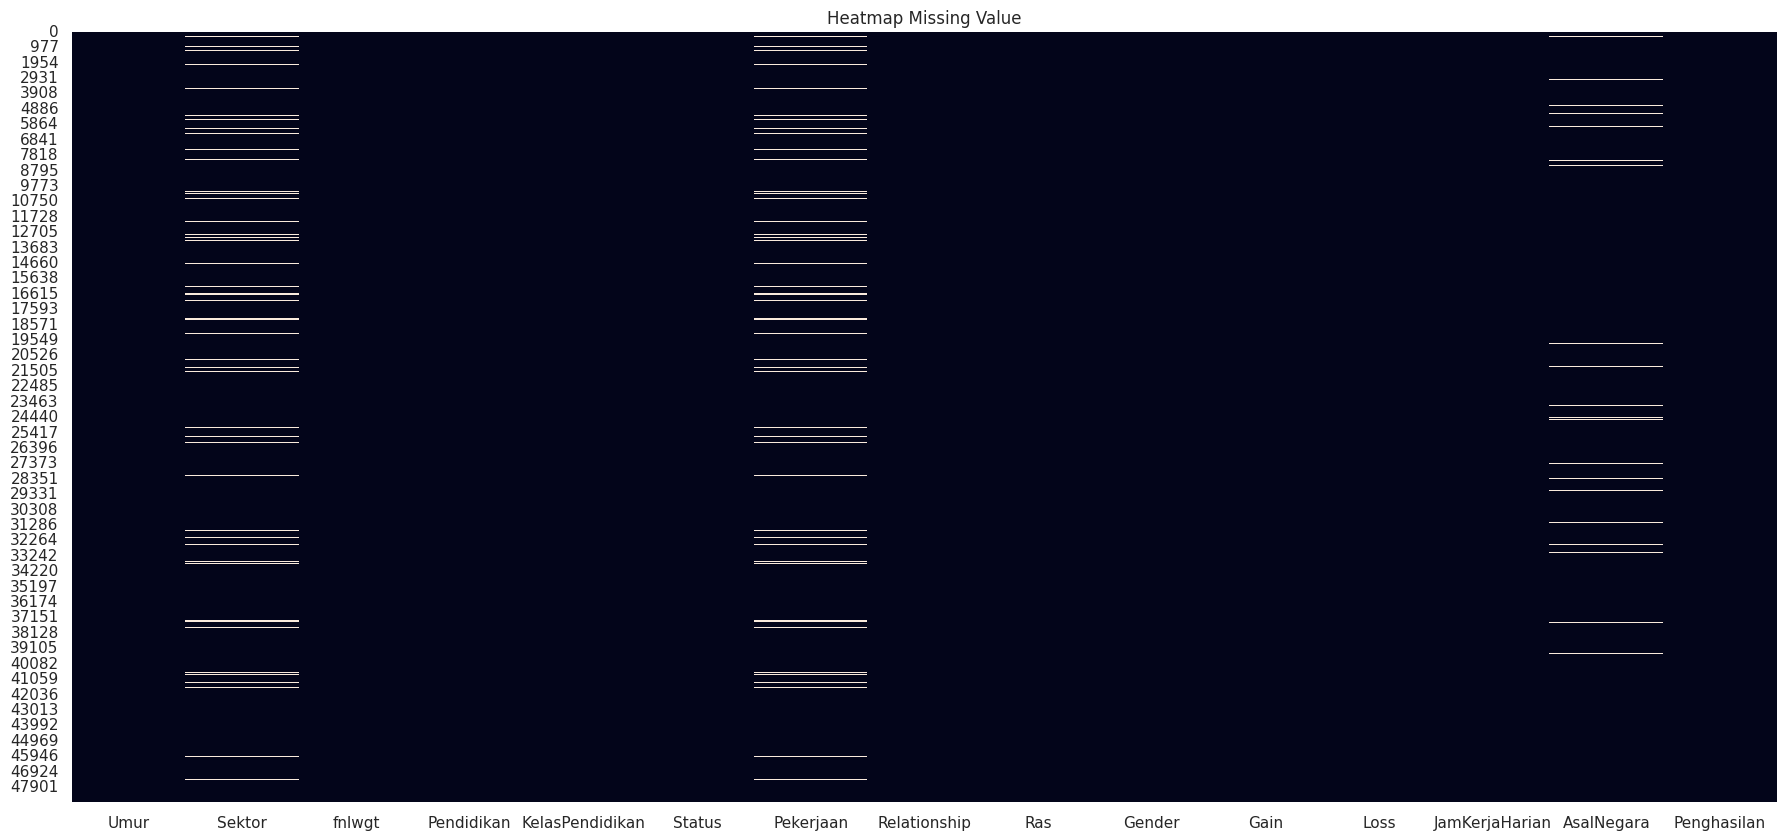

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
X = df.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#df.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(df.shape, X)
X.head()

(48813, 15)        Umur            Sektor  fnlwgt          Pendidikan  KelasPendidikan  \
0        39        Government   77516           Bachelors               13   
1        50  Self-emp-not-inc   83311           Bachelors               13   
2        38           Private  215646             HS-grad                9   
3        53           Private  234721  Senior High School                7   
4        28           Private  338409           Bachelors               13   
...     ...               ...     ...                 ...              ...   
48836    33           Private  245211           Bachelors               13   
48837    39           Private  215419           Bachelors               13   
48839    38           Private  374983           Bachelors               13   
48840    44           Private   83891           Bachelors               13   
48841    35      Self-emp-inc  182148           Bachelors               13   

               Status          Pekerjaan   Relation

Umur            Sektor  fnlwgt          Pendidikan  KelasPendidikan  \
0    39        Government   77516           Bachelors               13   
1    50  Self-emp-not-inc   83311           Bachelors               13   
2    38           Private  215646             HS-grad                9   
3    53           Private  234721  Senior High School                7   
4    28           Private  338409           Bachelors               13   

           Status          Pekerjaan   Relationship    Ras  Gender  Gain  \
0   Never-married       Adm-clerical  Not-in-family  White    Male  2174   
1  Married-spouse    Exec-managerial        Husband  White    Male     0   
2        Divorced  Handlers-cleaners  Not-in-family  White    Male     0   
3  Married-spouse  Handlers-cleaners        Husband  Black    Male     0   
4  Married-spouse     Prof-specialty           Wife  Black  Female     0   

   Loss  JamKerjaHarian     AsalNegara Penghasilan  
0     0              40  United-States       <=50K  
1     0              13  United-States       <=50K  
2     0              40  United-States       <=50K  
3     0              40  United-States       <=50K  
4     0              40           Cuba       <=50K

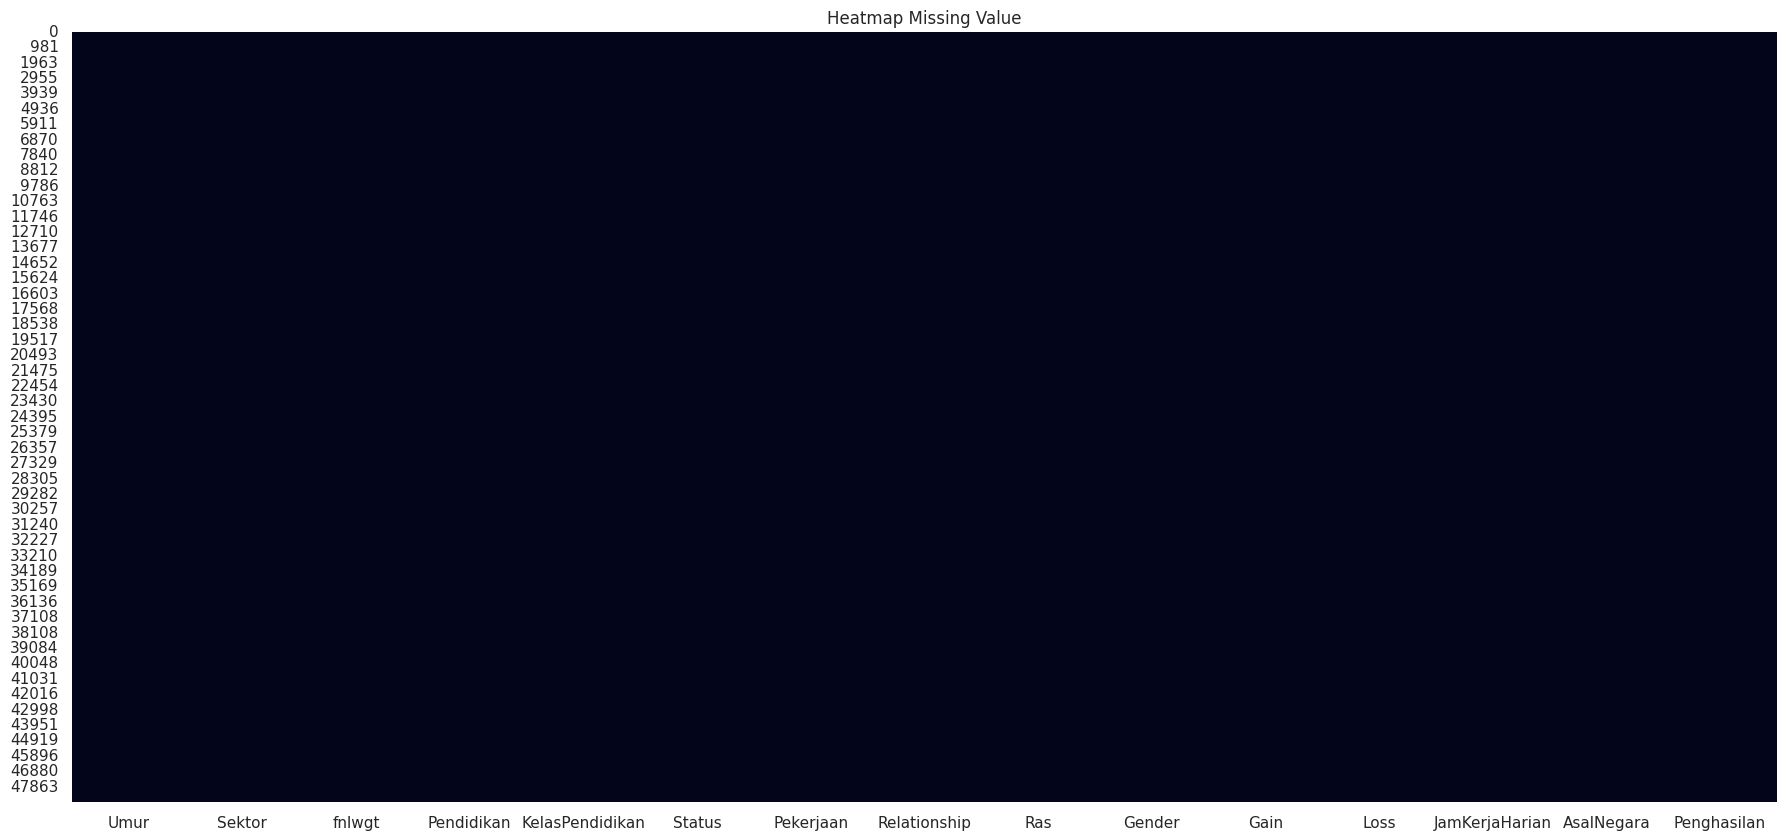

In [ ]:
sns.heatmap(X.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             45194 non-null  int64   
 1   Sektor           45194 non-null  category
 2   fnlwgt           45194 non-null  int64   
 3   Pendidikan       45194 non-null  category
 4   KelasPendidikan  45194 non-null  int64   
 5   Status           45194 non-null  object  
 6   Pekerjaan        45194 non-null  category
 7   Relationship     45194 non-null  category
 8   Ras              45194 non-null  category
 9   Gender           45194 non-null  category
 10  Gain             45194 non-null  int64   
 11  Loss             45194 non-null  int64   
 12  JamKerjaHarian   45194 non-null  int64   
 13  AsalNegara       45194 non-null  category
 14  Penghasilan      45194 non-null  category
dtypes: category(8), int64(6), object(1)
memory usage: 3.1+ MB


### transformasi

<center><h1><strong><font color="blue">Penelaahan Data (EDA) 06: Transformasi</font></strong></h1></center>
<center><h3><font color="red">Biasanya dilakukan karena Hal-Hal berikut:</font></h3></center>

* Variabel numerik & Model Menggunakan Konsep Jarak: Skala variabel berbeda jauh. Misal X1=Gaji dalam jutaan dan X2=Jumlah Anak
* Model yang digunakan Linear (Regresi), tapi ada variabel yang hubungannya dengan variabel target tidak linear. Mengacu pada Regresi Non Linear.
* Variabelnya Kategorik, tapi model hanya menerima input numerik ==> Maka perlu dibentuk Variabel Dummy atau (One-Hot) Encoding.

## Contoh Model Pohon Keputusan yang tidak bisa numerik di Scikit Learn:

- https://scikit-learn.org/stable/modules/tree.html
- https://github.com/scikit-learn/scikit-learn/issues/5442


## Categoric to numeric


In [ ]:
X['Status'] = X['Status'].astype('category')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Umur             45194 non-null  int64   
 1   Sektor           45194 non-null  category
 2   fnlwgt           45194 non-null  int64   
 3   Pendidikan       45194 non-null  category
 4   KelasPendidikan  45194 non-null  int64   
 5   Status           45194 non-null  category
 6   Pekerjaan        45194 non-null  category
 7   Relationship     45194 non-null  category
 8   Ras              45194 non-null  category
 9   Gender           45194 non-null  category
 10  Gain             45194 non-null  int64   
 11  Loss             45194 non-null  int64   
 12  JamKerjaHarian   45194 non-null  int64   
 13  AsalNegara       45194 non-null  category
 14  Penghasilan      45194 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


In [ ]:
for dtype, col in (list(zip(X.dtypes, X.columns))):
  if type == 'int64':
    print(col,dtype)
    print(X[col].min(), X[col].max())
  else:
    print(dtype)
    print(X[col].unique())

  print()

int64
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

category
['Government', 'Self-emp-not-inc', 'Private', 'Self-emp-inc', 'Not Pay']
Categories (5, object): ['Government', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'Not Pay']

int64
[ 77516  83311 215646 ... 173449  89686 350977]

category
['Bachelors', 'HS-grad', 'Senior High School', 'Masters', 'Junior High School', ..., 'Doctorate', 'Assoc-voc', 'Prof-school', 'Elementary School', 'Preschool']
Length: 12
Categories (12, object): ['Senior High School', 'Elementary School', 'Junior High School', 'Assoc-acdm',
                          ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

int64
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

category
['Never-married', 'Married-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Widowe

In [ ]:
X.shape

(45194, 15)

In [ ]:
pd.set_option('display.max_columns', None)
print(df.shape)
for col in catVar.columns:
    if col != 'Penghasilan':
        transformasi = pd.get_dummies(df[col], prefix='')
        df = pd.concat([df, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            df.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(df.shape)
df.head()

(48813, 15)
(48813, 98)


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
0    39   77516               13  2174     0              40       <=50K   
1    50   83311               13     0     0              13       <=50K   
2    38  215646                9     0     0              40       <=50K   
3    53  234721                7     0     0              40       <=50K   
4    28  338409               13     0     0              40       <=50K   

   _Government  _Private  _Self-emp-inc  _Self-emp-not-inc  _Not Pay  \
0            1         0              0                  0         0   
1            0         0              0                  1         0   
2            0         1              0                  0         0   
3            0         1              0                  0         0   
4            0         1              0                  0         0   

   _Senior High School  _Elementary School  _Junior High School  _Assoc-acdm  \
0                    0                   0                    0            0   
1                    0                   0                    0            0   
2                    0                   0                    0            0   
3                    1                   0                    0            0   
4                    0                   0                    0            0   

   _Assoc-voc  _Bachelors  _Doctorate  _HS-grad  _Masters  _Preschool  \
0           0           1           0         0         0           0   
1           0           1           0         0         0           0   
2           0           0           0         1         0           0   
3           0           0           0         0         0           0   
4           0           1           0         0         0           0   

   _Prof-school  _Some-college  _Divorced  _Married-spouse  \
0             0              0          0                0   
1             0              0          0                1   
2             0              0          1                0   
3             0              0          0                1   
4             0              0          0                1   

   _Married-spouse-absent  _Never-married  _Separated  _Widowed  \
0                       0               1           0         0   
1                       0               0           0         0   
2                       0               0           0         0   
3                       0               0           0         0   
4                       0               0           0         0   

   _Adm-clerical  _Armed-Forces  _Craft-repair  _Exec-managerial  \
0              1              0              0                 0   
1              0              0              0                 1   
2              0              0              0                 0   
3              0              0              0                 0   
4              0              0              0                 0   

   _Farming-fishing  _Handlers-cleaners  _Machine-op-inspct  _Other-service  \
0                 0                   0                   0               0   
1                 0                   0                   0               0   
2                 0                   1                   0               0   
3                 0                   1                   0               0   
4                 0                   0                   0               0   

   _Priv-house-serv  _Prof-specialty  _Protective-serv  _Sales  _Tech-support  \
0                 0                0                 0       0              0   
1                 0                0                 0       0              0   
2                 0                0                 0       0              0   
3                 0                0                 0       0              0   
4                 0                1                 0       0              0   

   _Transport-moving  _Husband  _Not-in-family

In [ ]:
pd.set_option('display.max_columns', None)
print(X.shape)
for col in catVar.columns:
  if col != 'Penghasilan':
    trans =  pd.get_dummies(X[col], prefix='')
    X = pd.concat([X,trans],axis = 1)
    try:
      X.drop([col], axis = 1, inplace = True)
    except Exception as err_:
      print(err_)
print(X.shape)
X.head()

(45194, 15)
(45194, 98)


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
0    39   77516               13  2174     0              40       <=50K   
1    50   83311               13     0     0              13       <=50K   
2    38  215646                9     0     0              40       <=50K   
3    53  234721                7     0     0              40       <=50K   
4    28  338409               13     0     0              40       <=50K   

   _Government  _Private  _Self-emp-inc  _Self-emp-not-inc  _Not Pay  \
0            1         0              0                  0         0   
1            0         0              0                  1         0   
2            0         1              0                  0         0   
3            0         1              0                  0         0   
4            0         1              0                  0         0   

   _Senior High School  _Elementary School  _Junior High School  _Assoc-acdm  \
0                    0                   0                    0            0   
1                    0                   0                    0            0   
2                    0                   0                    0            0   
3                    1                   0                    0            0   
4                    0                   0                    0            0   

   _Assoc-voc  _Bachelors  _Doctorate  _HS-grad  _Masters  _Preschool  \
0           0           1           0         0         0           0   
1           0           1           0         0         0           0   
2           0           0           0         1         0           0   
3           0           0           0         0         0           0   
4           0           1           0         0         0           0   

   _Prof-school  _Some-college  _Divorced  _Married-spouse  \
0             0              0          0                0   
1             0              0          0                1   
2             0              0          1                0   
3             0              0          0                1   
4             0              0          0                1   

   _Married-spouse-absent  _Never-married  _Separated  _Widowed  \
0                       0               1           0         0   
1                       0               0           0         0   
2                       0               0           0         0   
3                       0               0           0         0   
4                       0               0           0         0   

   _Adm-clerical  _Armed-Forces  _Craft-repair  _Exec-managerial  \
0              1              0              0                 0   
1              0              0              0                 1   
2              0              0              0                 0   
3              0              0              0                 0   
4              0              0              0                 0   

   _Farming-fishing  _Handlers-cleaners  _Machine-op-inspct  _Other-service  \
0                 0                   0                   0               0   
1                 0                   0                   0               0   
2                 0                   1                   0               0   
3                 0                   1                   0               0   
4                 0                   0                   0               0   

   _Priv-house-serv  _Prof-specialty  _Protective-serv  _Sales  _Tech-support  \
0                 0                0                 0       0              0   
1                 0                0                 0       0              0   
2                 0                0                 0       0              0   
3                 0                0                 0       0              0   
4                 0                1                 0       0              0   

   _Transport-moving  _Husband  _Not-in-family

## Pemodelan

### KNN (K - Nearest Neighbors)

In [ ]:
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
import time, numpy as np, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
N, P = X.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
X.head()

baris =  45194 , Kolom (jumlah variabel) =  98


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
0    39   77516               13  2174     0              40       <=50K   
1    50   83311               13     0     0              13       <=50K   
2    38  215646                9     0     0              40       <=50K   
3    53  234721                7     0     0              40       <=50K   
4    28  338409               13     0     0              40       <=50K   

   _Government  _Private  _Self-emp-inc  _Self-emp-not-inc  _Not Pay  \
0            1         0              0                  0         0   
1            0         0              0                  1         0   
2            0         1              0                  0         0   
3            0         1              0                  0         0   
4            0         1              0                  0         0   

   _Senior High School  _Elementary School  _Junior High School  _Assoc-acdm  \
0                    0                   0                    0            0   
1                    0                   0                    0            0   
2                    0                   0                    0            0   
3                    1                   0                    0            0   
4                    0                   0                    0            0   

   _Assoc-voc  _Bachelors  _Doctorate  _HS-grad  _Masters  _Preschool  \
0           0           1           0         0         0           0   
1           0           1           0         0         0           0   
2           0           0           0         1         0           0   
3           0           0           0         0         0           0   
4           0           1           0         0         0           0   

   _Prof-school  _Some-college  _Divorced  _Married-spouse  \
0             0              0          0                0   
1             0              0          0                1   
2             0              0          1                0   
3             0              0          0                1   
4             0              0          0                1   

   _Married-spouse-absent  _Never-married  _Separated  _Widowed  \
0                       0               1           0         0   
1                       0               0           0         0   
2                       0               0           0         0   
3                       0               0           0         0   
4                       0               0           0         0   

   _Adm-clerical  _Armed-Forces  _Craft-repair  _Exec-managerial  \
0              1              0              0                 0   
1              0              0              0                 1   
2              0              0              0                 0   
3              0              0              0                 0   
4              0              0              0                 0   

   _Farming-fishing  _Handlers-cleaners  _Machine-op-inspct  _Other-service  \
0                 0                   0                   0               0   
1                 0                   0                   0               0   
2                 0                   1                   0               0   
3                 0                   1                   0               0   
4                 0                   0                   0               0   

   _Priv-house-serv  _Prof-specialty  _Protective-serv  _Sales  _Tech-support  \
0                 0                0                 0       0              0   
1                 0                0                 0       0              0   
2                 0                0                 0       0              0   
3                 0                0                 0       0              0   
4                 0                1                 0       0              0   

   _Transport-moving  _Husband  _Not-in-family

In [ ]:
X_KNN = X.loc[:, ~X.columns.isin(['Penghasilan', 'fnlwgt', 'Gain', 'Loss', 'JamKerjaHarian', 'KelasPendidikan', 'Umur', 'Prof-school', 'Doctorate', '_Government',
                                  '_Private', '_Self-emp-not-inc ', '_Doctorate', '_Prof-school', '_Married-spouse', '_Exec-managerial', '_Prof-specialty',
                                  '_Husband', 'Wife', '_Asian-Pac-Islander', '_Female', '_Male'])]
y = X['Penghasilan']
xTrain, xTest, yTrain, yTest = train_test_split(X_KNN, y, stratify=y, test_size=0.75, random_state=42)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(11298, 80) (11298,)
(33896, 80) (33896,)


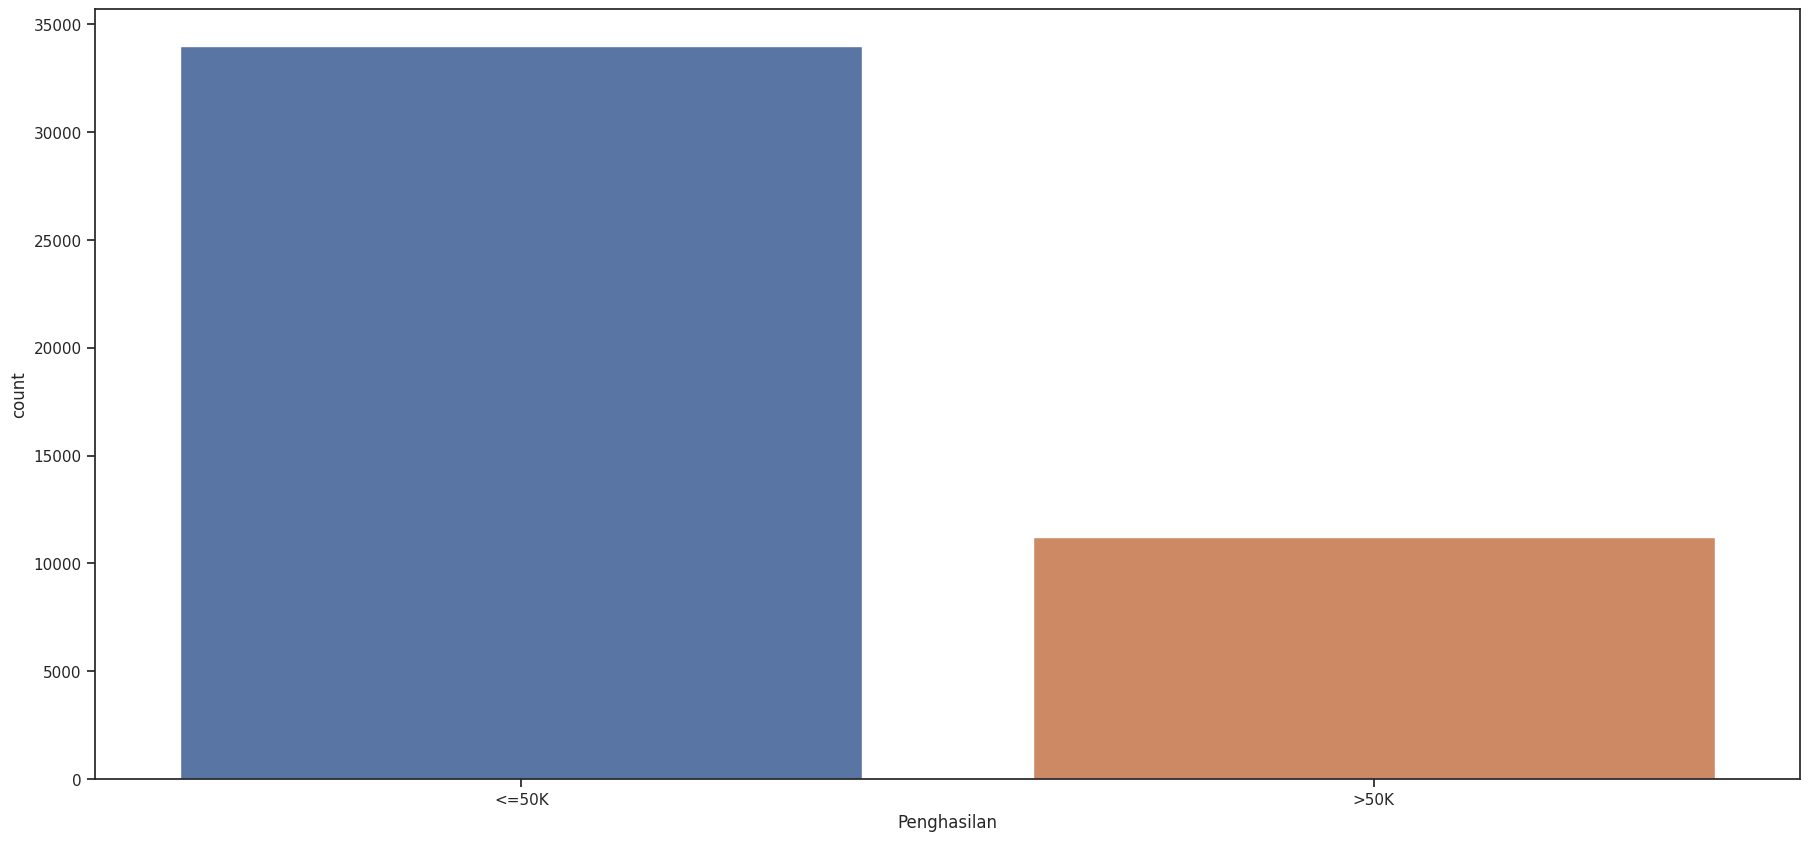

Counter({'<=50K': 33988, '>50K': 11206})
<50k =  75.2046731867062 % 50k =  24.7953268132938 %


In [ ]:
from collections import Counter

sns.countplot(data=X, x='Penghasilan')
plt.show()

D = Counter(X['Penghasilan'])
print(D)
print("<50k = ", D['<=50K']*100/(len(X['Penghasilan'])), '% 50k = ',D['>50K']*100/(len(X['Penghasilan'])) ,'%')
#Akurasi

Akurasi minimal 75.2%

In [ ]:
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(xTrain, yTrain)
model_KNN = model.predict(xTest)
print(confusion_matrix(yTest, model_KNN))
print(classification_report(yTest, model_KNN))

[[22432  3059]
 [ 3528  4877]]
              precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87     25491
        >50K       0.61      0.58      0.60      8405

    accuracy                           0.81     33896
   macro avg       0.74      0.73      0.73     33896
weighted avg       0.80      0.81      0.80     33896



In [ ]:
mulai = time.time()
scores_KNN = cross_val_score(model, X_KNN, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_KNN.mean(), scores_KNN.std() * 2, waktu))
# Kelemahan model KNN, apabila datanya terlalu besar, waktu yang dijalankan sedikit lama

Accuracy Regresi Logistik: 0.80 (+/- 0.02), Waktu = 57.151 detik


model    0.784023
dtype: float64

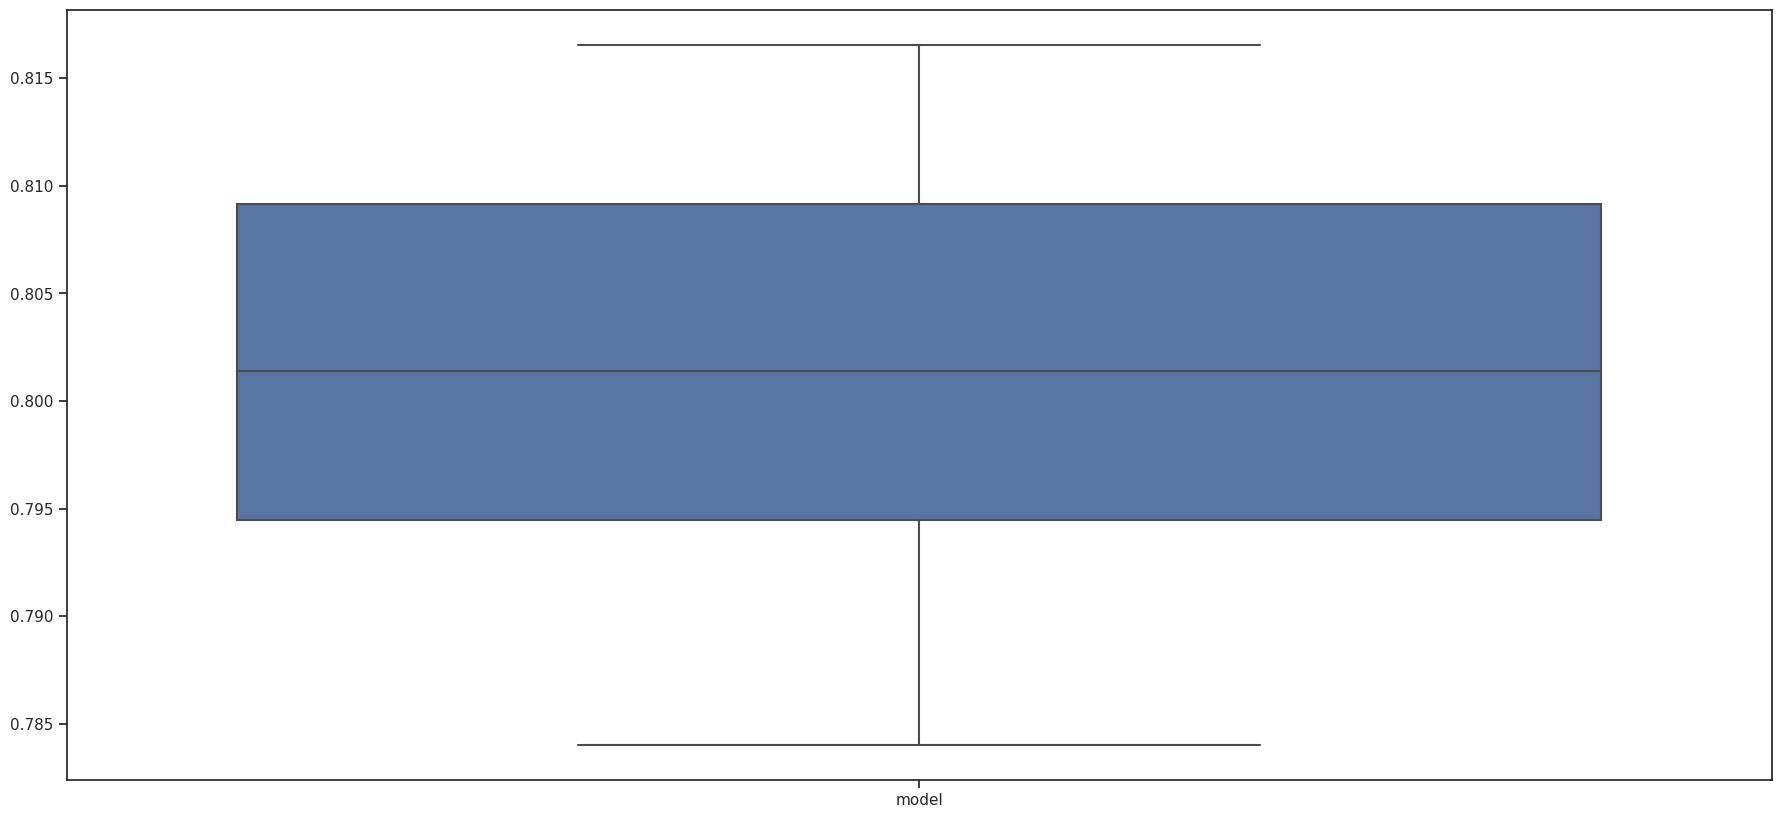

In [ ]:
df_ = pd.DataFrame({'model': scores_KNN})
p = sns.boxplot(data = df_)
df_.min()

### Regresi Logistik

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
N, P = X.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
X.head()

baris =  45194 , Kolom (jumlah variabel) =  98


Umur  fnlwgt  KelasPendidikan  Gain  Loss  JamKerjaHarian Penghasilan  \
0    39   77516               13  2174     0              40       <=50K   
1    50   83311               13     0     0              13       <=50K   
2    38  215646                9     0     0              40       <=50K   
3    53  234721                7     0     0              40       <=50K   
4    28  338409               13     0     0              40       <=50K   

   _Government  _Private  _Self-emp-inc  _Self-emp-not-inc  _Not Pay  \
0            1         0              0                  0         0   
1            0         0              0                  1         0   
2            0         1              0                  0         0   
3            0         1              0                  0         0   
4            0         1              0                  0         0   

   _Senior High School  _Elementary School  _Junior High School  _Assoc-acdm  \
0                    0                   0                    0            0   
1                    0                   0                    0            0   
2                    0                   0                    0            0   
3                    1                   0                    0            0   
4                    0                   0                    0            0   

   _Assoc-voc  _Bachelors  _Doctorate  _HS-grad  _Masters  _Preschool  \
0           0           1           0         0         0           0   
1           0           1           0         0         0           0   
2           0           0           0         1         0           0   
3           0           0           0         0         0           0   
4           0           1           0         0         0           0   

   _Prof-school  _Some-college  _Divorced  _Married-spouse  \
0             0              0          0                0   
1             0              0          0                1   
2             0              0          1                0   
3             0              0          0                1   
4             0              0          0                1   

   _Married-spouse-absent  _Never-married  _Separated  _Widowed  \
0                       0               1           0         0   
1                       0               0           0         0   
2                       0               0           0         0   
3                       0               0           0         0   
4                       0               0           0         0   

   _Adm-clerical  _Armed-Forces  _Craft-repair  _Exec-managerial  \
0              1              0              0                 0   
1              0              0              0                 1   
2              0              0              0                 0   
3              0              0              0                 0   
4              0              0              0                 0   

   _Farming-fishing  _Handlers-cleaners  _Machine-op-inspct  _Other-service  \
0                 0                   0                   0               0   
1                 0                   0                   0               0   
2                 0                   1                   0               0   
3                 0                   1                   0               0   
4                 0                   0                   0               0   

   _Priv-house-serv  _Prof-specialty  _Protective-serv  _Sales  _Tech-support  \
0                 0                0                 0       0              0   
1                 0                0                 0       0              0   
2                 0                0                 0       0              0   
3                 0                0                 0       0              0   
4                 0                1                 0       0              0   

   _Transport-moving  _Husband  _Not-in-family

In [ ]:
predictor = X.loc[:, ~X.columns.isin(['Penghasilan', 'fnlwgt', 'Gain', 'Loss'])]
target = X['Penghasilan']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.75, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(11298, 94) (11298,)
(33896, 94) (33896,)


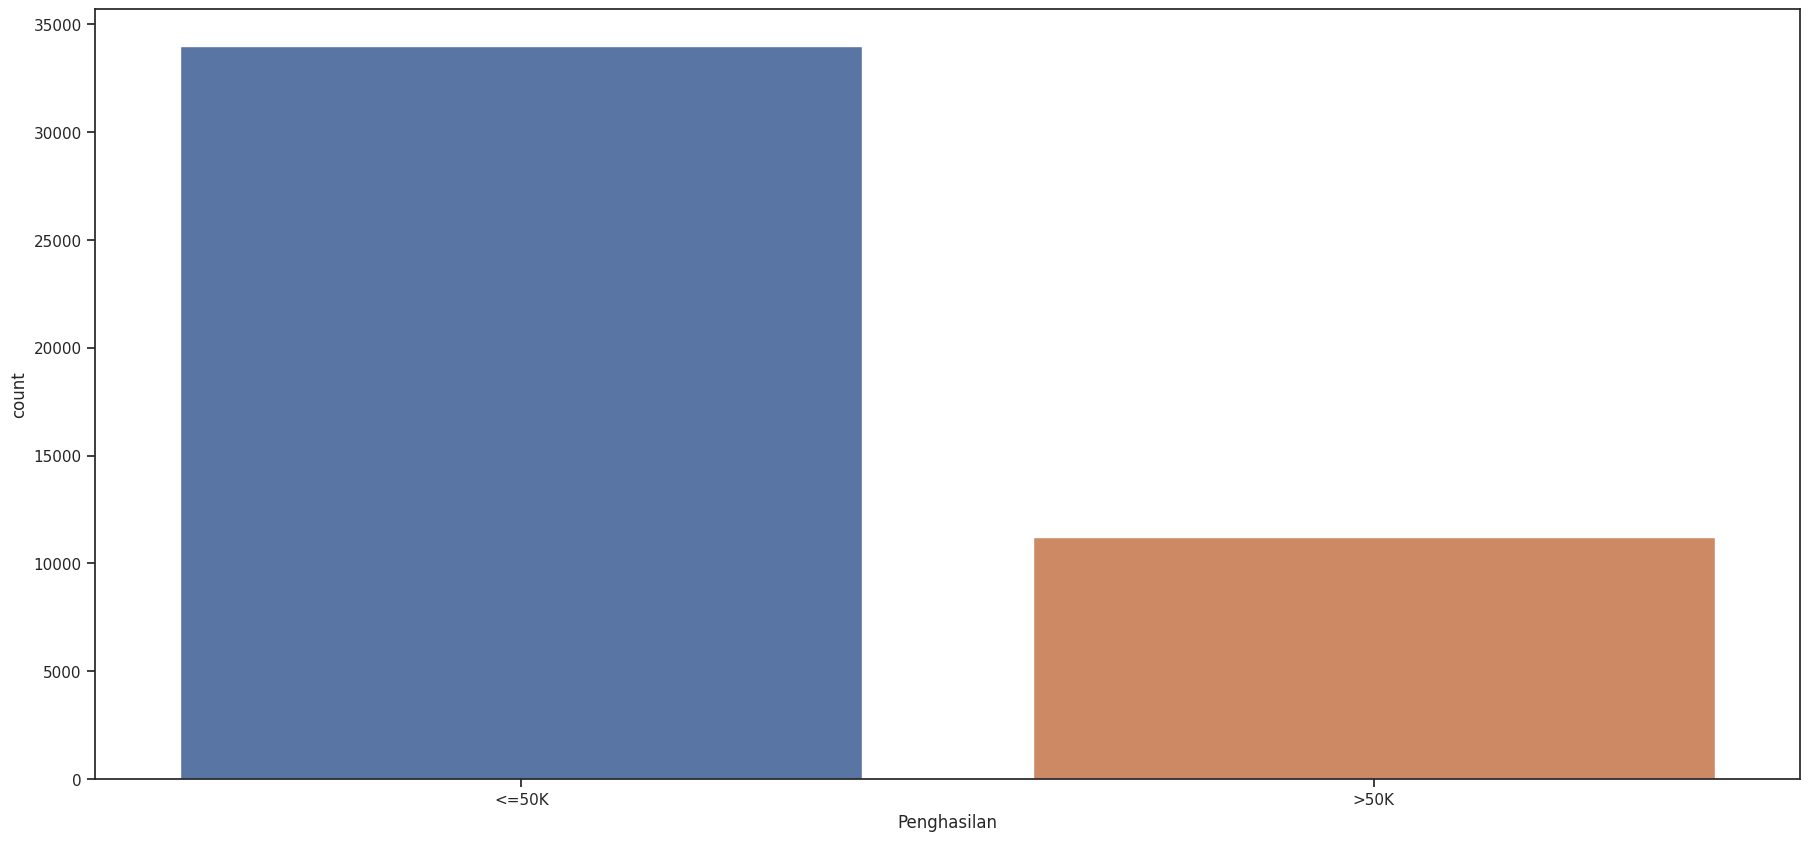

Counter({'<=50K': 33988, '>50K': 11206})
<50k =  75.2046731867062 % 50k =  24.7953268132938 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=X, x='Penghasilan')
plt.show()

D = Counter(X['Penghasilan'])
print(D)
print("<50k = ", D['<=50K']*100/(len(X['Penghasilan'])), '% 50k = ',D['>50K']*100/(len(X['Penghasilan'])) ,'%')
#Akurasi

akurasi minimal 76%

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[23342  2122]
 [ 3650  4782]]
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     25464
        >50K       0.69      0.57      0.62      8432

    accuracy                           0.83     33896
   macro avg       0.78      0.74      0.76     33896
weighted avg       0.82      0.83      0.82     33896



In [ ]:
#cross validasi
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.83 (+/- 0.01), Waktu = 15.024 detik


RegLog    0.81969
dtype: float64

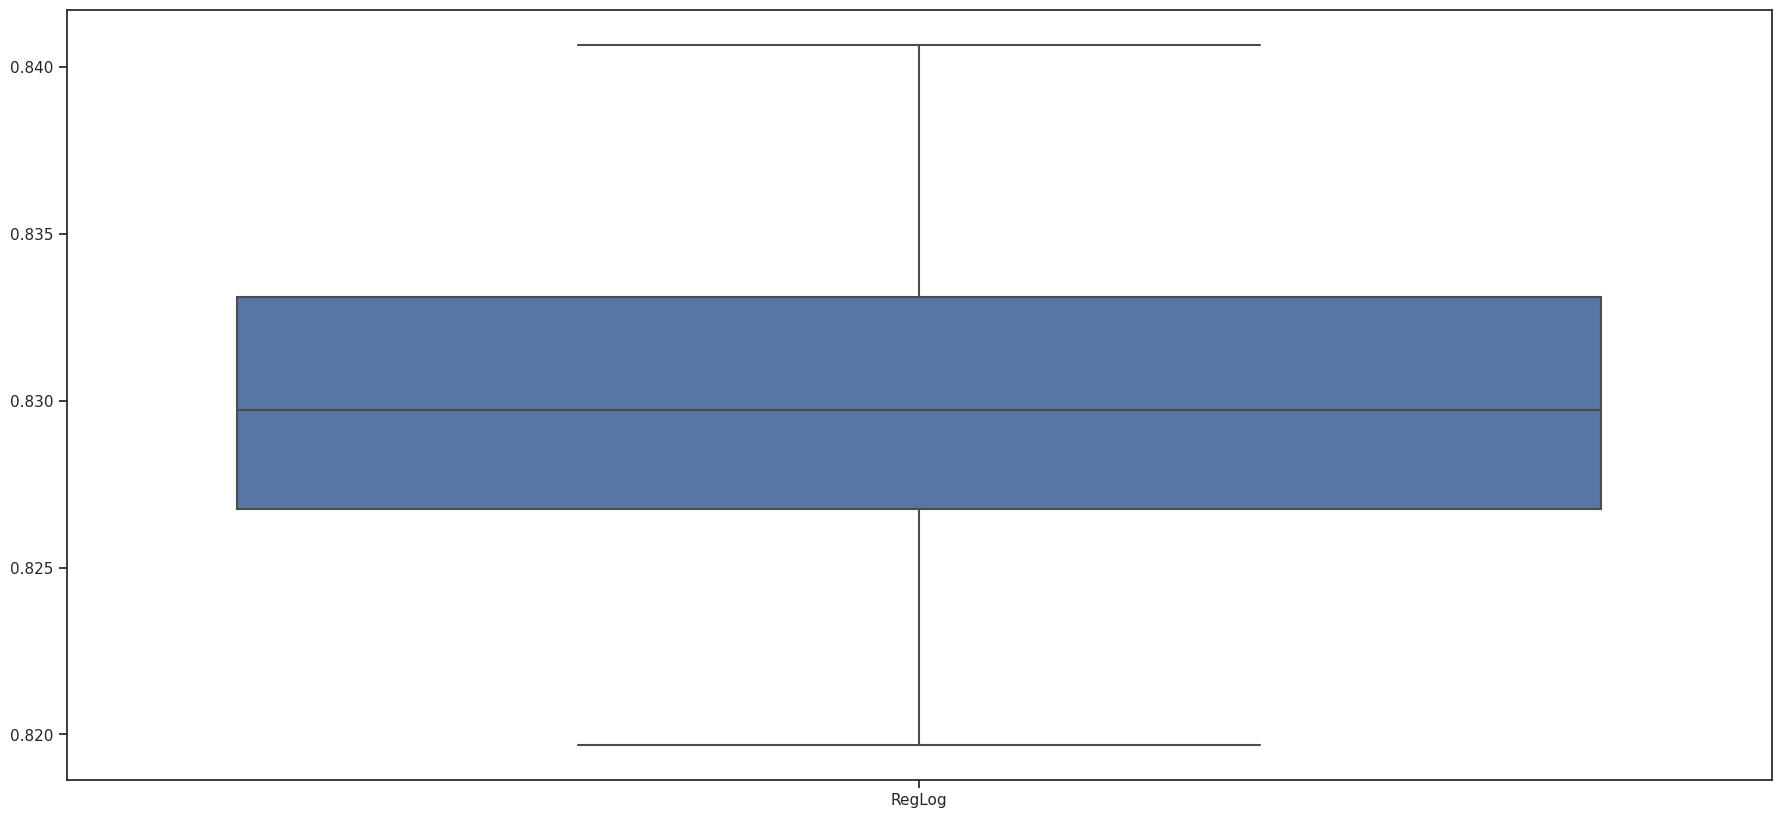

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

### Desicion Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[21811  3653]
 [ 3952  4480]]
              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.85     25464
        >50K       0.55      0.53      0.54      8432

    accuracy                           0.78     33896
   macro avg       0.70      0.69      0.70     33896
weighted avg       0.77      0.78      0.77     33896



In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.78 (+/- 0.01), Waktu = 6.303 detik


In [ ]:
# Variabel importances
fitur_penting = pd.DataFrame({'Feature_Name' : DT.feature_names_in_, 'Feature_Importance' : DT.feature_importances_})
fitur_penting.sort_values(by = 'Feature_Importance', ascending = False).head(10)

Feature_Name  Feature_Importance
0               Umur            0.229904
21   _Married-spouse            0.222815
1    KelasPendidikan            0.144790
2     JamKerjaHarian            0.111817
4           _Private            0.017017
29  _Exec-managerial            0.015892
37            _Sales            0.014046
3        _Government            0.013677
35   _Prof-specialty            0.013454
28     _Craft-repair            0.012241

In [ ]:
predictor1 = X.loc[:, ~X.columns.isin(['Penghasilan', 'fnlwgt', 'Gain', 'Loss', '_Married-spouse', 'Umur', 'KelasPendidikan', 'JamKerjaHarian', '_Private', '_Exec-managerial', '_Government', '_Self-emp-not-inc', '_Craft-repair', '_Sales'])]
target1 = X['Penghasilan']

xTrainfp, xTestfp, yTrainfp, yTestfp = train_test_split(predictor, target, test_size=0.75, random_state=33)
print(xTrainfp.shape, yTrainfp.shape)
print(xTestfp.shape, yTestfp.shape)

(11298, 94) (11298,)
(33896, 94) (33896,)


In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT_fp = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT_fp = DT_fp.fit(xTrainfp, yTrainfp)
prediksi_DT_fp = DT_fp.predict(xTestfp)

print(confusion_matrix(yTest, prediksi_DT_fp))
print(classification_report(yTest, prediksi_DT_fp))

[[21788  3676]
 [ 3995  4437]]
              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.85     25464
        >50K       0.55      0.53      0.54      8432

    accuracy                           0.77     33896
   macro avg       0.70      0.69      0.69     33896
weighted avg       0.77      0.77      0.77     33896



In [ ]:
mulai = time.time()
scores_dt_fp = cross_val_score(DT_fp, predictor1, target1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt_fp.mean(), scores_dt_fp.std() * 2, waktu))

Accuracy Decision Tree: 0.82 (+/- 0.01), Waktu = 5.322 detik


RegLog        0.819690
DecTree       0.767648
DecTree_FP    0.808407
KNN           0.784023
dtype: float64

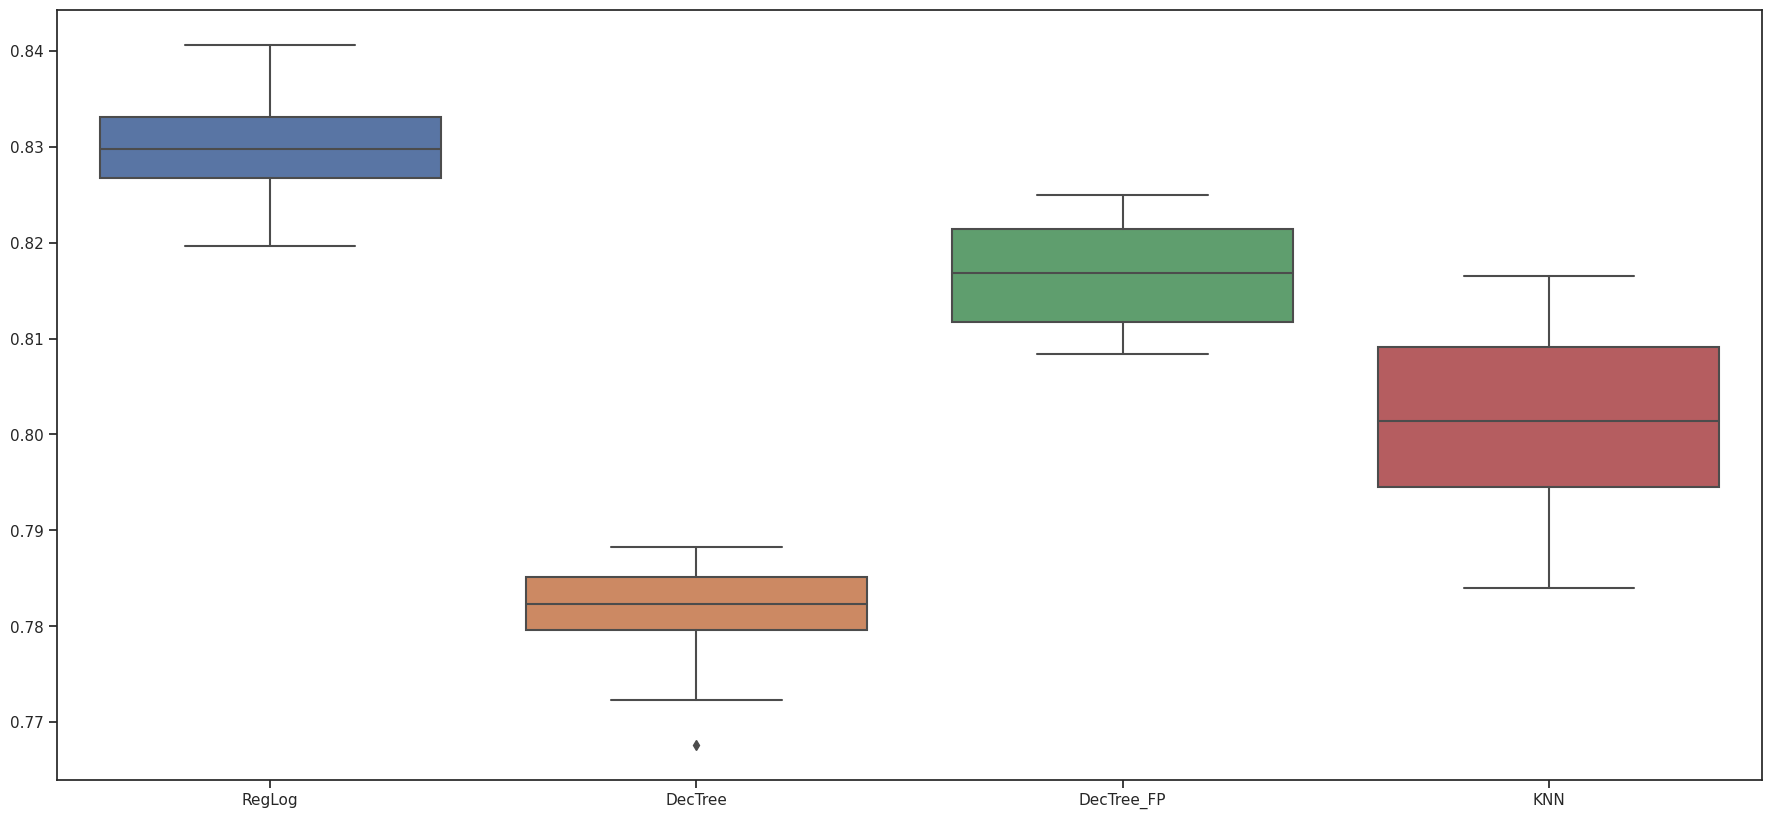

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt, "DecTree_FP":scores_dt_fp, 'KNN':scores_KNN})
p = sns.boxplot(data = df_)
df_.min()

### optimasi parameter

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
mean_acc = np.zeros(20)
for i in range (1,21):
  knn = KNeighborsClassifier(n_neighbors = i).fit(xTrain,yTrain)
  yhat= knn.predict(xTest)
  mean_acc[i-1] = metrics.accuracy_score(yTest, yhat)

mean_acc

array([0.76593108, 0.7882936 , 0.78870663, 0.79879632, 0.7955511 ,
       0.80165801, 0.80192353, 0.80496224, 0.80136299, 0.8044607 ,
       0.80195303, 0.80387066, 0.80257257, 0.80637833, 0.80366415,
       0.80575879, 0.80342813, 0.80637833, 0.80357564, 0.80564078])

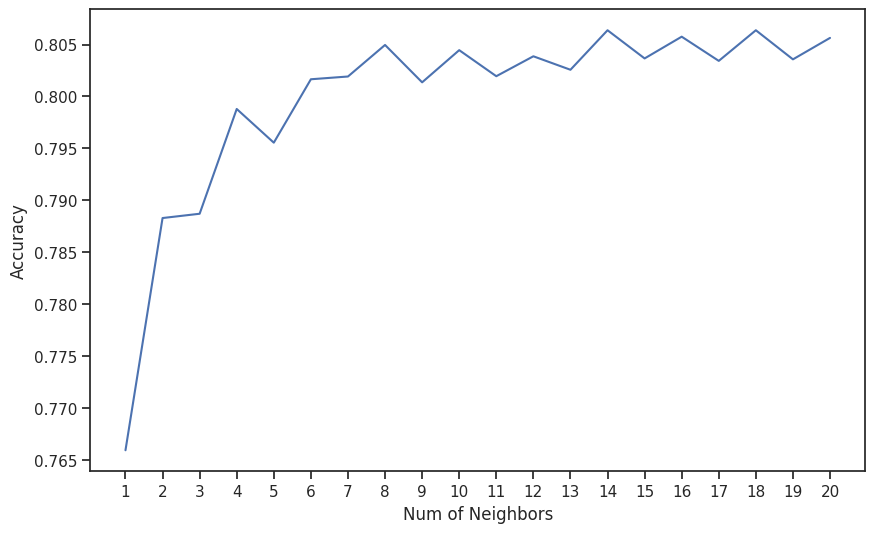

In [ ]:
loc = np.arange(1,21, step=1.0)
plt.figure(figsize = (10,6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Num of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {'n_neighbors' : [19, 20],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [ ]:
g_res = gs.fit(xTrain, yTrain)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [ ]:
g_res.best_score_

0.8173149548899881

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(xTrain, yTrain)

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [ ]:
y_hat = knn.predict(xTrain)
y_knn = knn.predict(xTest)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(yTrain, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(yTest, y_knn))

Training set accuracy:  0.8271375464684015
Test set accuracy:  0.805640783573283


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yTest, y_knn))

[[23165  2299]
 [ 4289  4143]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yTest, y_knn))

              precision    recall  f1-score   support

       <=50K       0.84      0.91      0.88     25464
        >50K       0.64      0.49      0.56      8432

    accuracy                           0.81     33896
   macro avg       0.74      0.70      0.72     33896
weighted avg       0.79      0.81      0.80     33896



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_KNN, y, cv =10)

In [ ]:
print('Model accuracy: ', np.mean(scores))

Model accuracy:  0.8179627511764487


In [ ]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8303231910117642
{'C': 0.1}


In [ ]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8187291596447637
{'max_depth': 6, 'criterion': 'gini'}


In [ ]:
# Optimal parameter Desion Tree FP
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
DTmodel_fp = tree.DecisionTreeClassifier()
dtree_gscv_fp = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv_fp.fit(xTrainfp, yTrainfp)

print(dtree_gscv_fp.best_score_)
print(dtree_gscv_fp.best_params_)

0.8204110458781756
{'max_depth': 4, 'criterion': 'gini'}


Accuracy RL: 0.83 (+/- 0.02)
Accuracy DT: 0.83 (+/- 0.02)
Accuracy DT_fp: 0.81 (+/- 0.02)
Accuracy KNN: 0.82 (+/- 0.02)


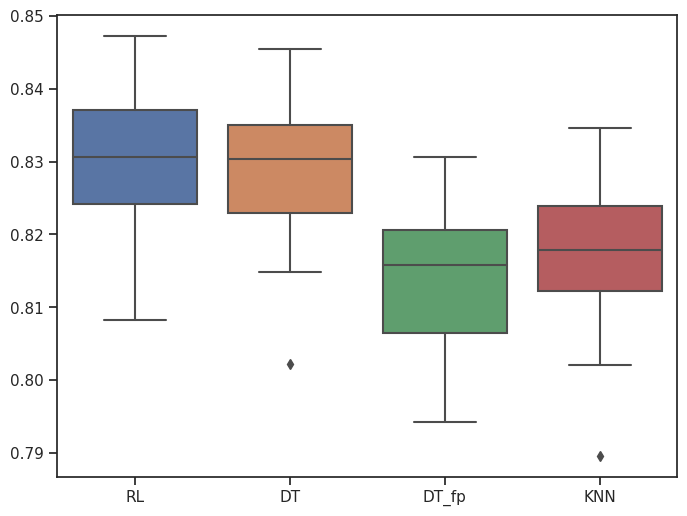

In [ ]:
kCV = 30 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'lbfgs')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
DT_fp_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
knn_opt = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform',algorithm = 'brute', metric = 'minkowski')

# Melakukan Cross Validasi
models = ['RL', 'DT', 'DT_fp', 'KNN']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_fp_score = cross_val_score(DT_fp_opt, predictor1, target1, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
knn_score = cross_val_score(knn, X_KNN, y, cv =kCV, scoring='accuracy', n_jobs=-2, verbose = 0)
scores = [RL_score, DT_score, DT_fp_score, knn_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)